<a href="https://colab.research.google.com/github/MakhamudDrame/ML_lab/blob/main/LAB_2_Linregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### О задании

Задание состоит из последовательных вопросов (отвечать на них обязательно, код и графики без интерпретации не имеют никакого смысла, иначе - снижение баллов), посвященных работе с табличными данными, но на более низком уровне с помощью Numpy

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

***DeadLine - 14.03.2024 23:59***


## Инструкция по сдаче ДЗ.



0. Просмотр лекции обязателен. Не потому что без этого невозможно выполнить домашнее задание, а потому что с этим выполнение домашнего задания станет комфортным, приятным и быстрым. Вы потратите намного меньше времени для изучения материала и понимания того, что от Вас хотят, нежели сразу приступите к выполнению домашнего задания без просмотра лекции.

1. Скопируйте к себе колаб-ноутбук.

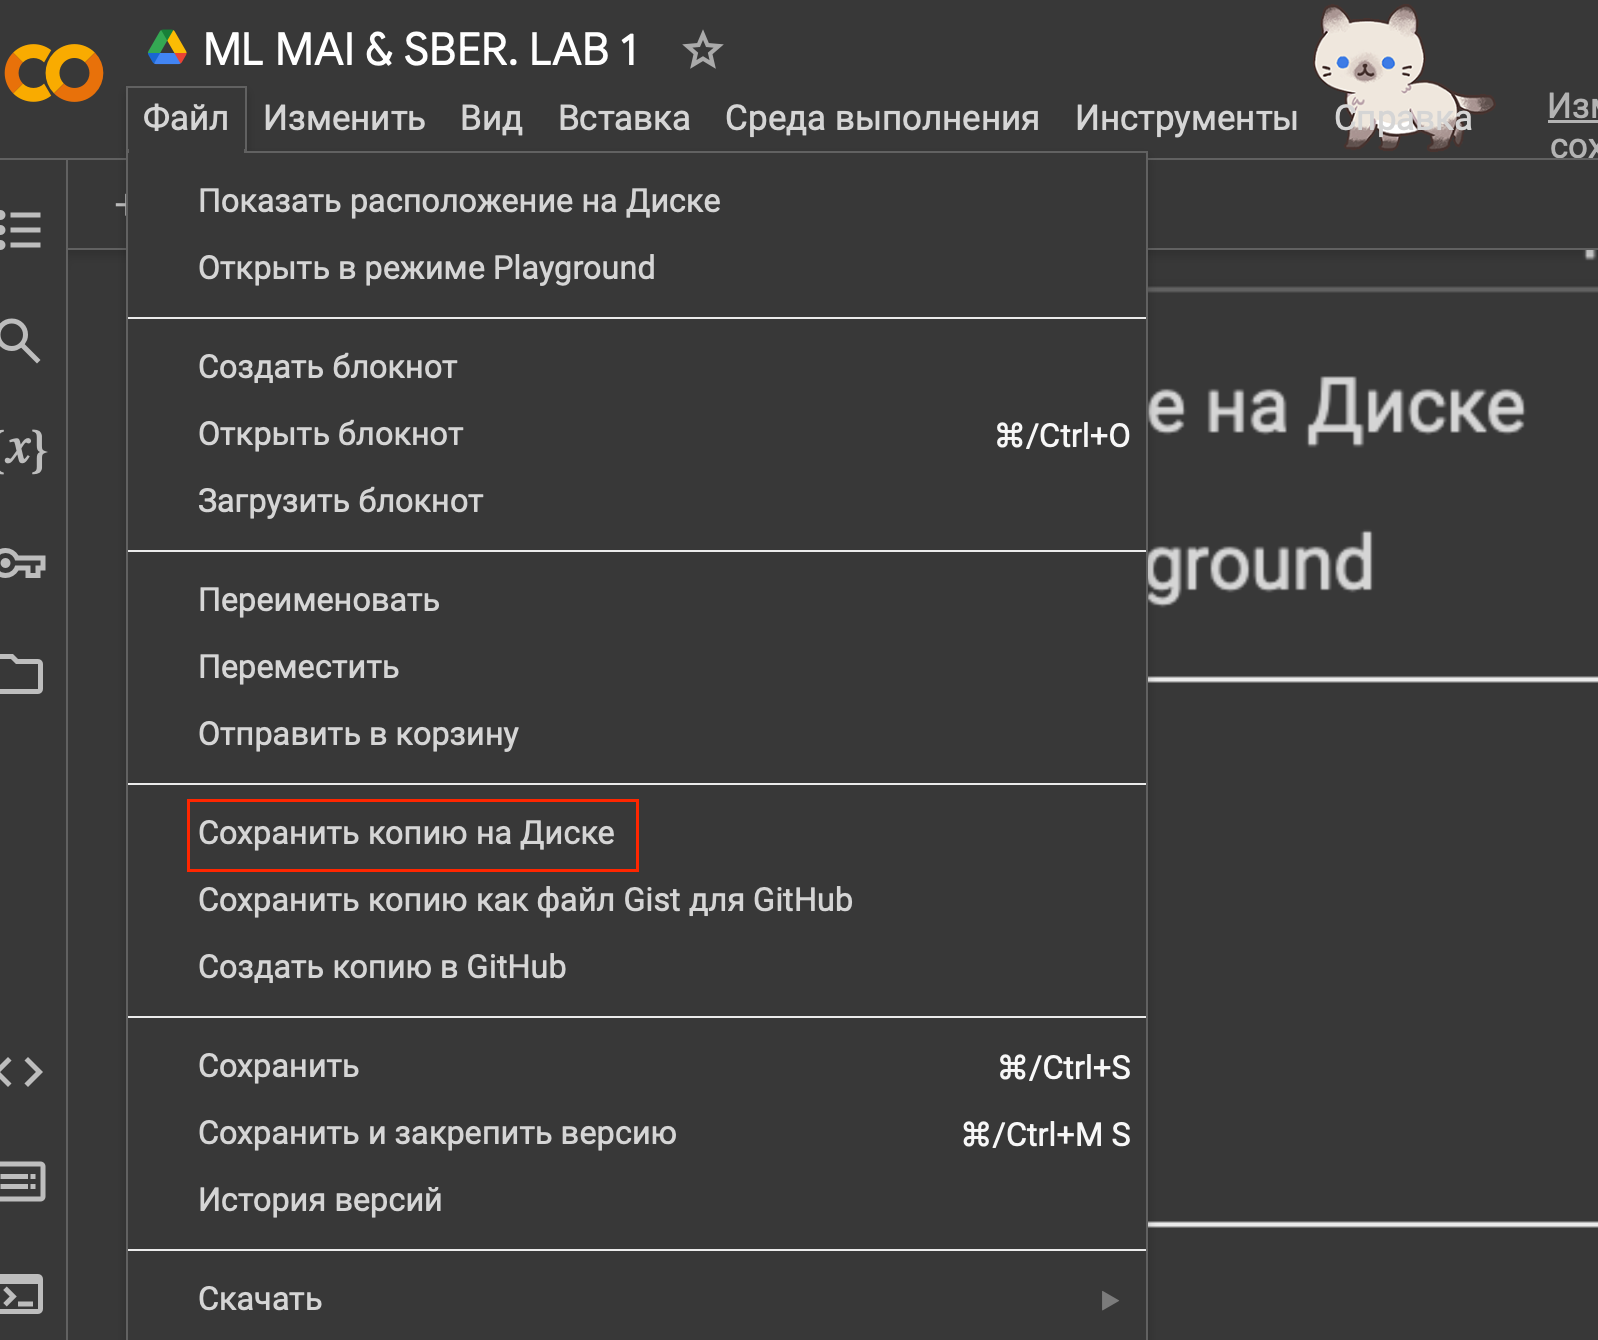

2. у Вас откроется файл в новой вкладке с названием "Копия...". После описания задания вы пишите решение этого задания.

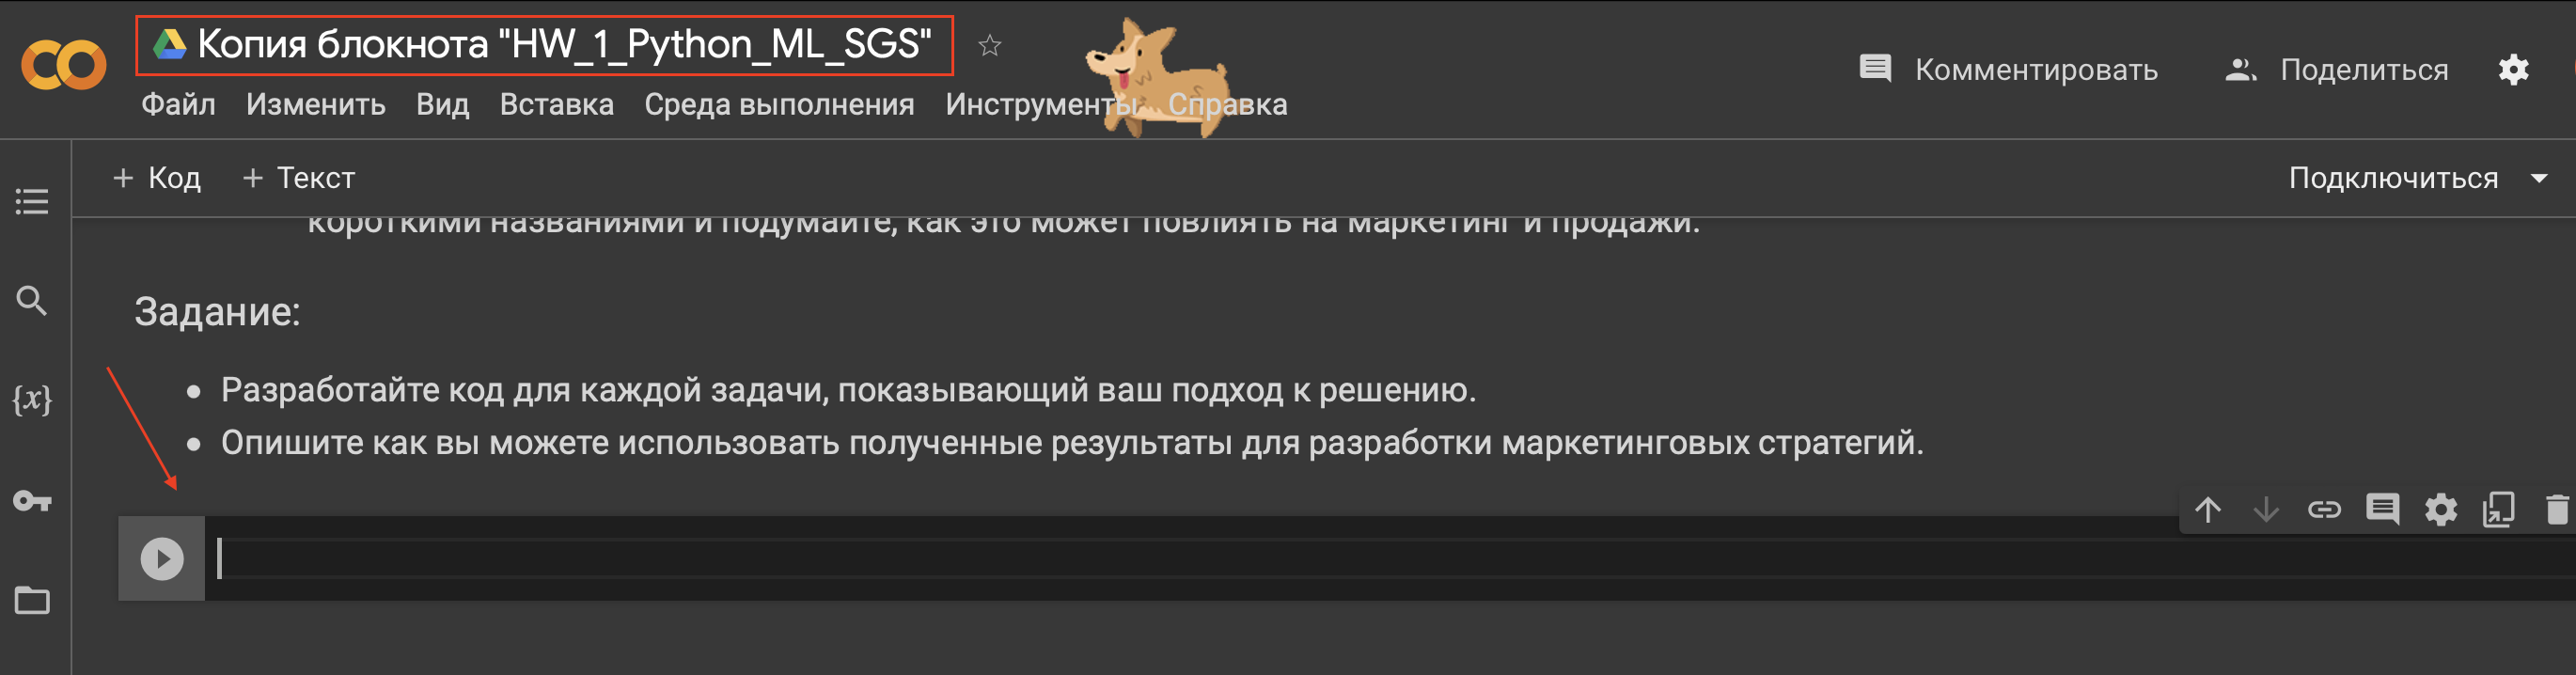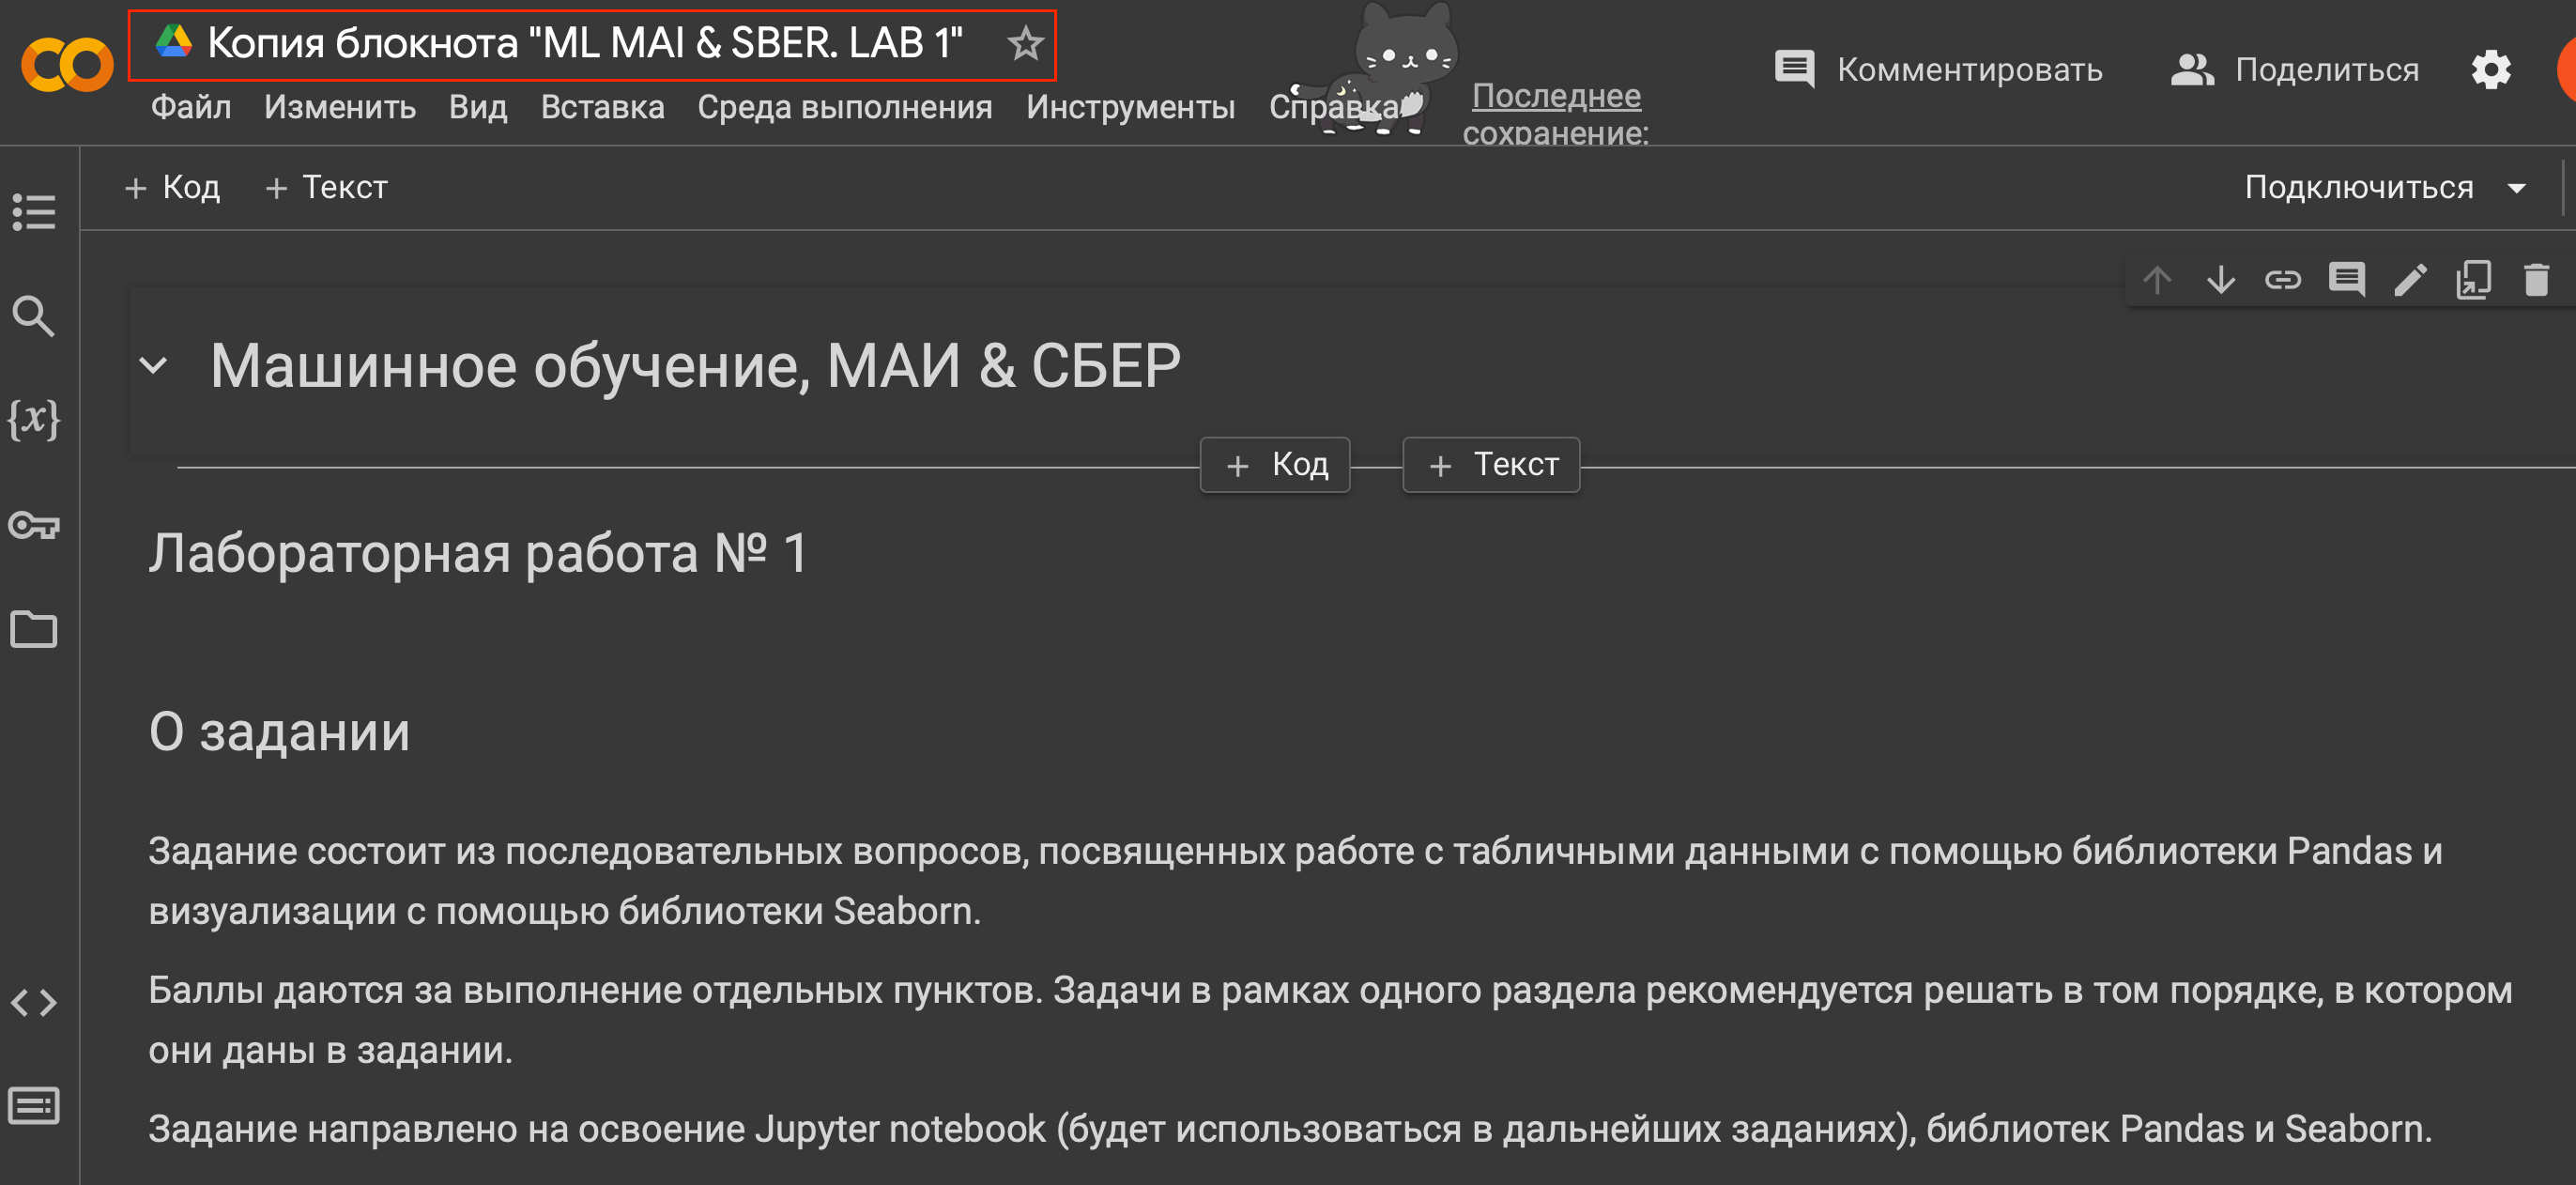

3. После выполнения домашнего задания нажмите кнопку "поделиться" и перейдите в режим доступно всем по ссылке

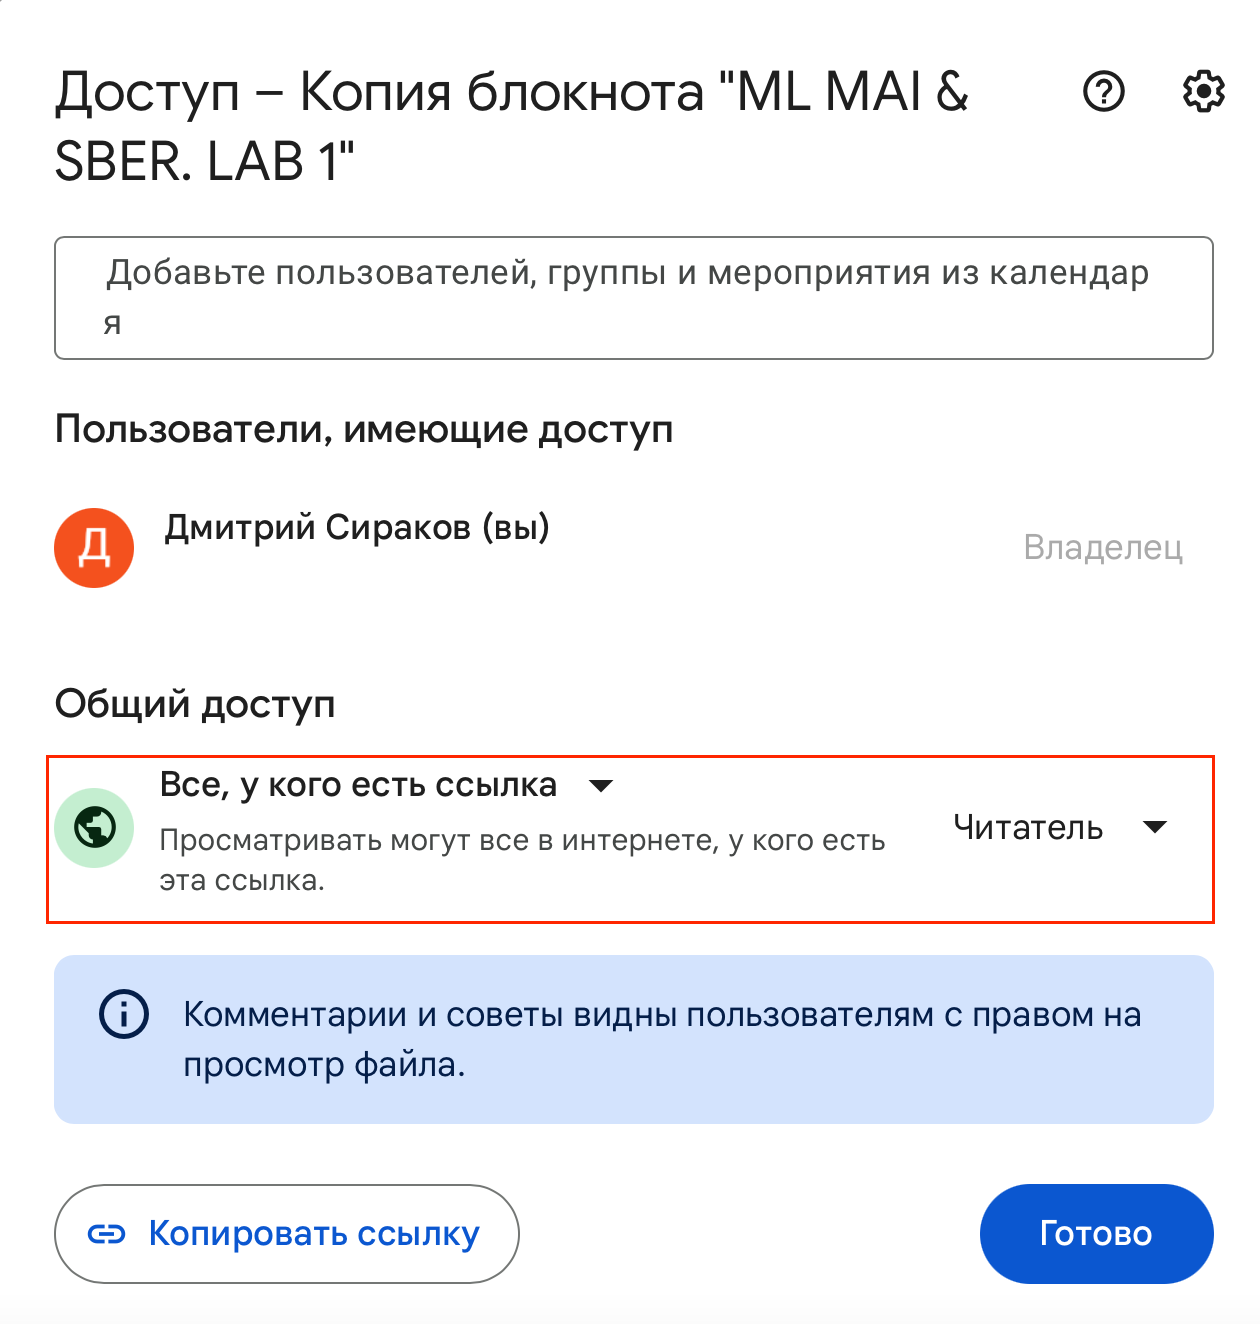

4. Загрузите эту ссылку в lms.mai.ru по курсу "Машинное обучение" в качестве ссылки в раздел "Pandas - работа с таблицами для машинного обучения (ЛР) [17.02]"


В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

# Задание

## Часть 0. Подготовка [+0.5 балла]

**Задание 1 [+0.5 балла]**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

https://drive.google.com/file/d/1seQNXHpD8kO9dHS4sdNj7rhLbINNSH92/view?usp=sharing

In [ ]:
!gdown 1seQNXHpD8kO9dHS4sdNj7rhLbINNSH92

Downloading...
From (original): https://drive.google.com/uc?id=1seQNXHpD8kO9dHS4sdNj7rhLbINNSH92
From (redirected): https://drive.google.com/uc?id=1seQNXHpD8kO9dHS4sdNj7rhLbINNSH92&confirm=t&uuid=7a7e4240-83bc-4d18-98dd-e191f6c623f2
To: /content/nyc-taxi-trip-duration.zip
100% 89.9M/89.9M [00:01<00:00, 83.3MB/s]


In [ ]:
! unzip /content/nyc-taxi-trip-duration.zip


Archive:  /content/nyc-taxi-trip-duration.zip
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
! unzip /content/train.zip

Archive:  /content/train.zip
  inflating: train.csv               


In [ ]:
df = pd.read_csv('train.csv')
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

В колонке `dropoff_datetime` содержится информация о времени окончания поездки, однако эта колонка присутствует только в обучающей выборке и отсутствует в тестовой. Это создаёт проблему, так как при обучении модели мы не сможем использовать эту колонку для предсказаний на новых данных. В связи с этим, чтобы избежать ошибок и упростить анализ, рекомендуется удалить колонку `dropoff_datetime` из датасета.

Колонка `pickup_datetime` содержит дату и время начала поездки в формате строки, что затрудняет выполнение операций с датами и временем, таких как вычисление продолжительности поездки или анализ зависимости цены от времени суток. Преобразование этих данных в `datetime`-объекты позволит использовать методы для работы с датой (вместо огромного количества строк для решения какой-нибудь маленькой подзадачи будет использоваться один вызов метода)

In [ ]:
# Удаление признака dropoff_datetime
df = df.drop(columns = 'dropoff_datetime')
df.shape

(1458644, 10)

In [ ]:
# Преобразование признака pickup_datetime в datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

В колонке `trip_duration` содержится значение, которое мы стремимся предсказать. Давайте изучим распределение целевой переменной в обучающем наборе данных. Для этого построим гистограмму этой переменной.

Построение гистограммы целевой переменной важно по нескольким причинам:

1. **Понимание распределения**: Гистограмма помогает нам увидеть, как распределены значения целевой переменной. Это может дать представление о том, является ли распределение нормальным, скошенным или имеет выбросы.

2. **Выявление аномалий**: При анализе гистограммы мы можем обнаружить аномальные значения или выбросы, которые могут повлиять на качество модели.

3. **Выбор подходящего алгоритма**: Понимание распределения целевой переменной может помочь в выборе наиболее правильного анализа датасета. Например, если данные сильно скошены, может потребоваться преобразование данных перед обучением модели. (как на практическом занятии, если у нас таргет расположен по экспоненте, то было бы классно предсказывать логарифм, а не экспоненту (подробнее было на лекции))


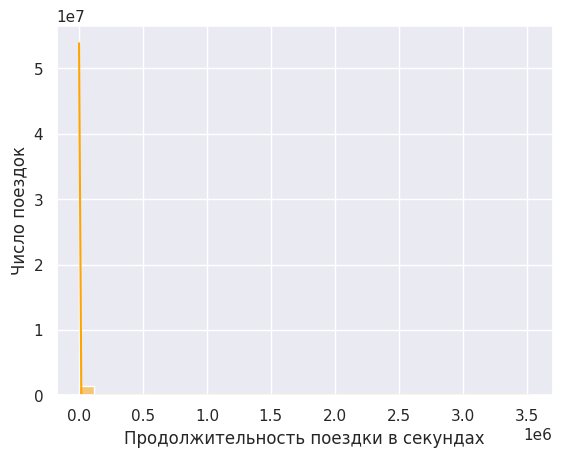

In [ ]:
sns.histplot(df['trip_duration'], color='orange', bins=30, kde=True)

plt.xlabel('Продолжительность поездки в секундах')
plt.ylabel('Число поездок')
plt.show()

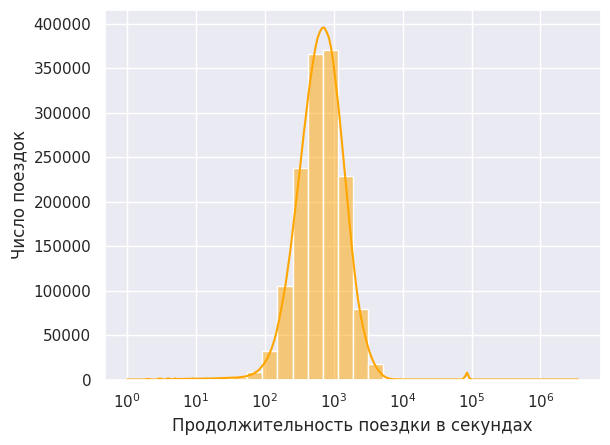

In [ ]:
sns.histplot(df['trip_duration'], color='orange', bins=30, kde=True, log_scale=True)

plt.xlabel('Продолжительность поездки в секундах')
plt.ylabel('Число поездок')
plt.show()

In [ ]:
# Минимум, максимум и стандартное отклонение  продолжительности поездки
df['trip_duration'].agg(['min', 'max', 'mean' ,'std'])

min     1.000000e+00
max     3.526282e+06
mean    9.594923e+02
std     5.237432e+03
Name: trip_duration, dtype: float64

In [ ]:
# Посчитаем 95 квантиль в минутах
df['trip_duration'].quantile(0.95)/60

35.06666666666667

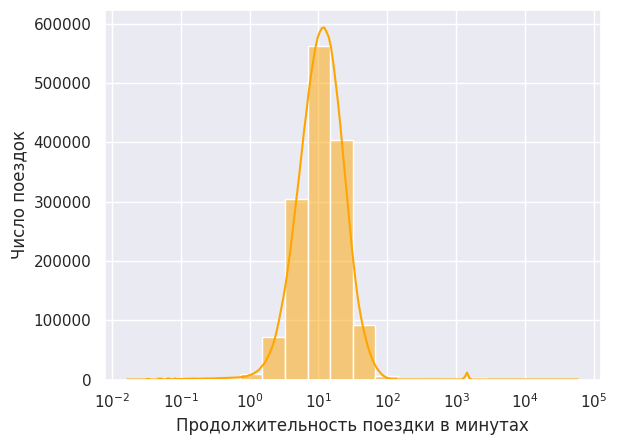

In [ ]:
# Переведем секунды в минуты для наглядности
df['trip_duration_minutes'] = df['trip_duration'] / 60

sns.histplot(df['trip_duration_minutes'], bins=20, kde=True, color='orange', log_scale=True)

plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Число поездок')
plt.show()


In [ ]:
# Удалим временный признак
df = df.drop(columns = 'trip_duration_minutes')
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Изначально гистограмма состояла из одного столбца, где собирались почти все значения. Логарифмировання гистограмма похожа на  нормальное распределение с отдельными  очень большими выбросами справа. Большинство значений расположены между 100 секундами и 35 минутами, средняя поездка составляет 959 секунд, при этом стандартное отклонение составляет 87 минут из-за выбросов, где длина поездки  более 1000 минут

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

RMSLE штрафует заниженные предсказания сильнее, чем завышенные. Метрика более чувствительной к небольшим ошибкам в предсказании малых значений и менее чувствительной к большим ошибкам в предсказании крупных значений.Заниженные предсказания могут быть более критичными, например, недооценка времени поездки.

Мы изучили несколько вариантов линейной регрессии в sklearn, но все они минимизировали среднеквадратичную ошибку (MSE), а не среднеквадратичную логарифмическую ошибку (RMSLE). Для работы с RMSLE мы можем использовать следующий подход: вместо прямого предсказания целевой переменной, мы будем предсказывать ее логарифм. Пусть $\hat{y}_i = \log{(y_i + 1)}$ будет модифицированной целевой переменной, а $\hat{a}(x_i)$ — предсказание модели, обученной на $\hat{y}_i$. Чтобы получить исходное предсказание, мы используем обратное преобразование: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

\

Это преобразование позволяет нам оптимизировать MSE для логарифмированных значений, что эквивалентно оптимизации RMSLE для исходных значений. Это связано с тем, что минимизация квадратичной ошибки между логарифмами прогнозов и реальных значений соответствует минимизации логарифмической ошибки между самими прогнозами и реальными значениями ***(для дополнительного балла можете доказать почему)***. Таким образом, этот подход позволяет использовать стандартные методы линейной регрессии для задач, где требуется минимизировать RMSLE.






In [ ]:
# np.log1p(x)=ln(1+x)
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  log_trip_duration  
0               40.765602                  N            455           6.122493  
1               40.731152                  N            663           6.498282  
2               40.710087                  N           2124           7.661527  
3               40.706718                  N            429           6.063785  
4               40.782520                  N            435           6.077642  
...                   ...                ...            ...                ...  
1458639         40.740170                  N            778           6.658011  
1458640         40.796547                  N            655           6.486161  
1458641         40.707371                  N            764           6.639876  
1458642         40.757107                  N            373           5.924256  
1458643         40.790585                  N            198           5.293305  

[1458644 rows x 11 columns]

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

***(Какая константа прекрасно оптимизирует RMSLE MSE (с преобразованиями?))***

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(c + 1)}\big)^2}$$
Если расписать это выражение как функцию потерь и перейти к минимизации функции потерь, нужно ее продиффириенцировать по второму члену под корнем и прировнять к нулю.  Значие константы:
$$
c = \exp\left(\frac{1}{\ell} \sum_{i=1}^{\ell} \log(y_i + 1)\right) - 1
$$

In [ ]:
def rmsle(log1p_y_true, log1p_y_pred):
    rmsle = np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))
    return rmsle

log1p_y_true = df['log_trip_duration']    # Ответы в логарифмической шкале np.log1p(x)=ln(1+x)
mean_log1p_y_true = np.mean(log1p_y_true) #  Среденее  для расчета константы
c = np.exp(mean_log1p_y_true) - 1         #     Константа   в исходной шкале
log1p_y_pred = np.log1p(c) * np.ones_like(log1p_y_true)  # Массив констант в лог шкале равный числу ответов

rmsle_best_const = rmsle(log1p_y_true, log1p_y_pred)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


In [ ]:
# Предсказание в  исходной шкале  np.expm1(x)=e**x - 1
y_pred_original = np.expm1(rmsle_best_const)
y_pred_original

1.2161229197349508

RMSLE показывает, во сколько раз предсказание отличается от истинного значения.
 RMSLE в исходной шкале = 1.2161 означает, что модель ошибается в среднем на 121.61% от истинного значения. RMSLE  отражает относительную ошибку, а не абсолютную.

## Часть 1. Изучаем `pickup_datetime` & Обучаем модель [+1 балл]


**Задание 2 [+0.125 балла]**. Для начала давайте проанализируем общее количество поездок по дням. Построим график, отражающий зависимость числа поездок от конкретного дня в году (например, можно использовать `sns.countplot`).

Просмотр этой информации важен по нескольким причинам:

1. **Выявление закономерностей**: Анализ количества поездок по дням может помочь выявить определенные закономерности или тренды, например, повышенный спрос в выходные дни или праздничные периоды.

2. **Обнаружение аномалий**: График может помочь идентифицировать дни с необычно высоким или низким количеством поездок, что может указывать на наличие аномалий или особых событий.

3. **Корректировка моделей**: Если анализ показывает, что спрос сильно колеблется в зависимости от дня, это может потребовать учета этого фактора в моделях прогнозирования.

In [ ]:
# Создадим новые колонки из признака pickup_datetime(начало поездки)
df['day_of_year'] = df['pickup_datetime'].dt.dayofyear  #
df['day_of_week'] = df['pickup_datetime'].dt.day_name() #
df['hour'] = df['pickup_datetime'].dt.hour              #
df['month'] = df['pickup_datetime'].dt.month            #

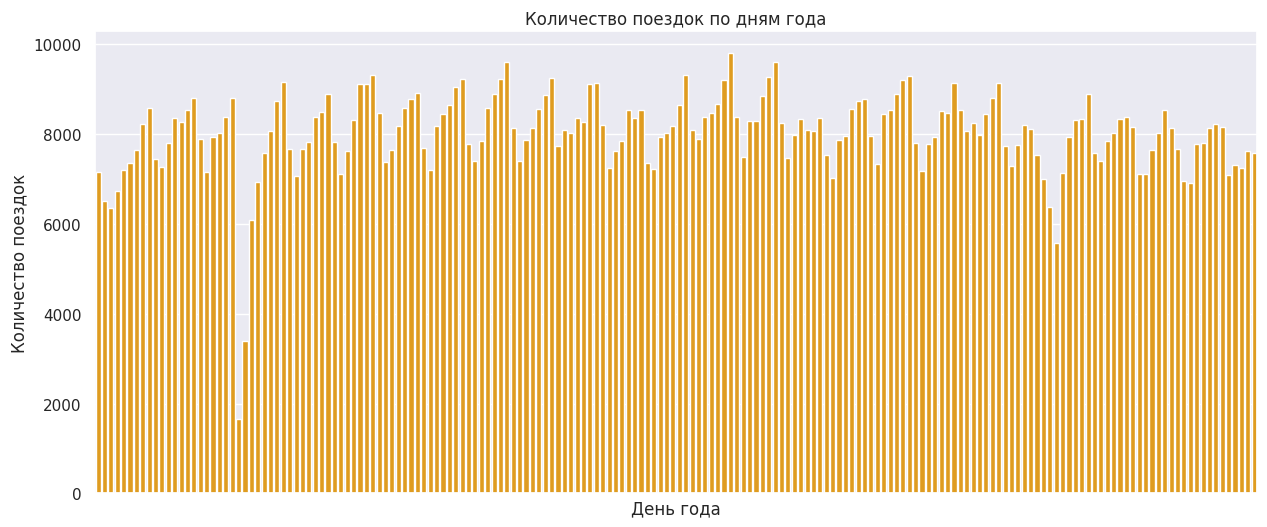

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='day_of_year', data=df, color='orange')
plt.title('Количество поездок по дням года')
plt.xlabel('День года')
plt.ylabel('Количество поездок')
plt.xticks([])
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [ ]:
df['date'] = df['pickup_datetime'].dt.date
trip_counts = df.groupby('date')['id'].count()
min_days = trip_counts.nsmallest(2)
print(min_days)

date
2016-01-23    1648
2016-01-24    3383
Name: id, dtype: int64


Дни с наименьшим числом поездок 2016-01-23 и 2016-01-24.В эти дни Нью-Йорк был охвачен мощным снежным штормом, который принес сильные снегопады, сильный ветер и низкие температуры. Это было одно из крупнейших зимних событий, которое затруднило передвижение, вызвало закрытие школ, задержку или отмену авиарейсов и вызвало множество аварий на дорогах. В некоторых районах города было выпало до 60 см снега. Шторм также привел к значительным перебоям в движении транспорта.

Прекращение деятельности по уборке снега. Местные власти Нью-Йорка были вынуждены приостановить уборку снега на улицах города из-за продолжающихся снежных осадков и сильных ветров, что усложнило ситуацию с очисткой города от снега.





<Figure size 1000x600 with 0 Axes>

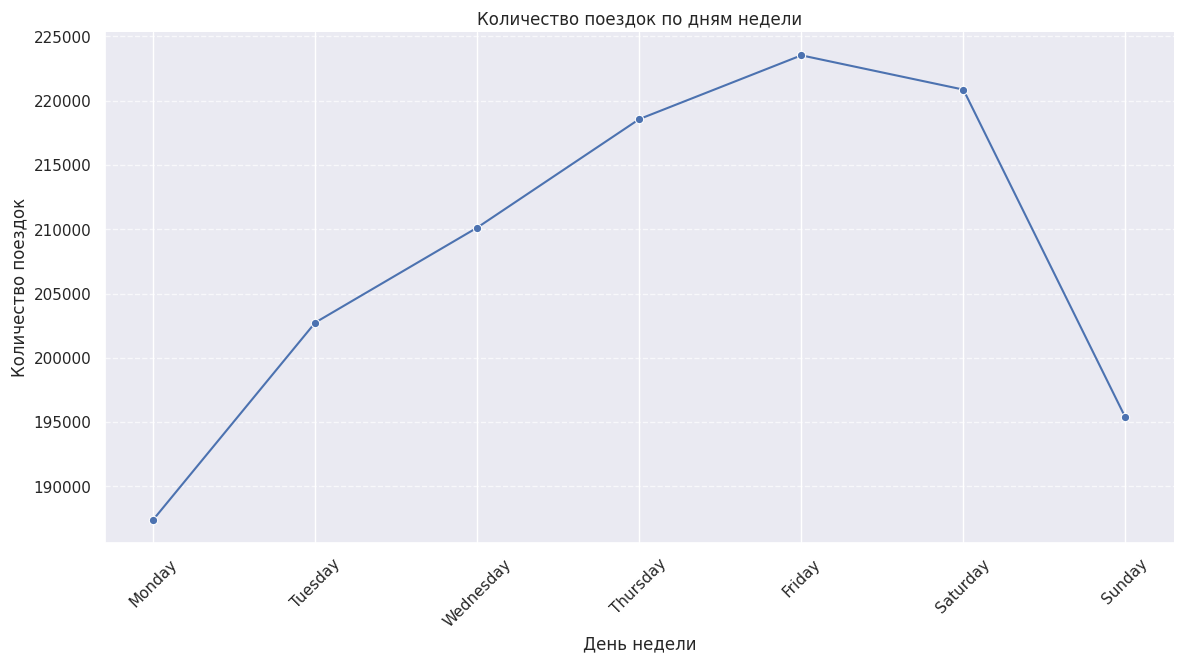

<Figure size 1200x600 with 0 Axes>

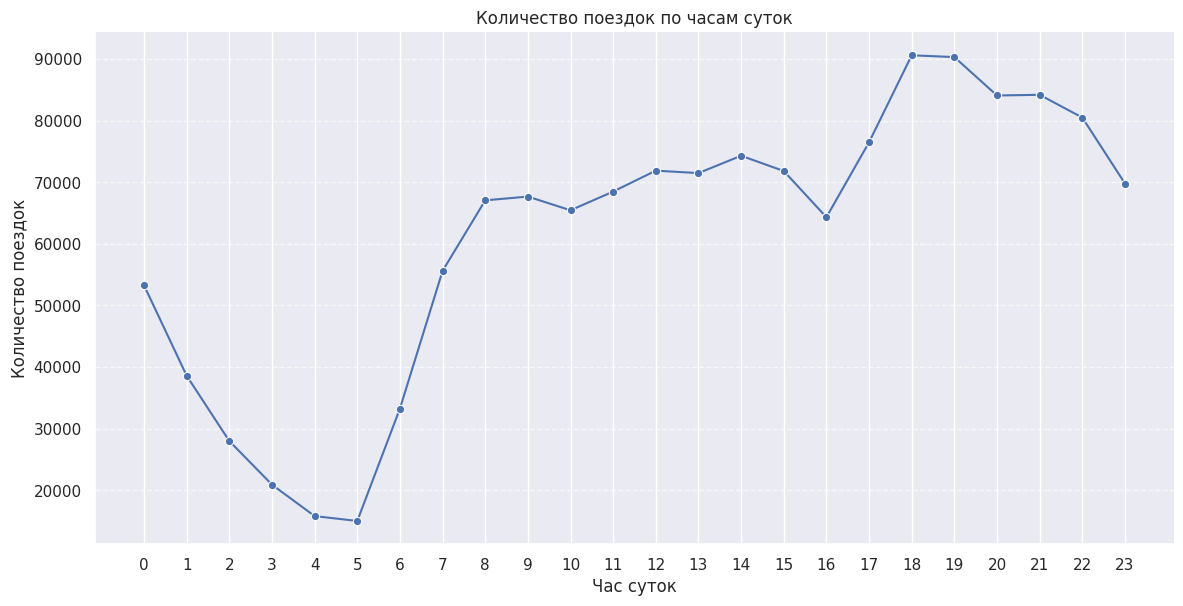

In [ ]:
# Группировка по дню недели и подсчет количества поездок
weekly_trips = df.groupby('day_of_week').size().reset_index(name='trip_count')

# Группировка по часу суток и подсчет количества поездок
hourly_trips = df.groupby('hour').size().reset_index(name='trip_count')

# Упорядочим дни недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_trips['day_of_week'] = pd.Categorical(weekly_trips['day_of_week'], categories=weekday_order, ordered=True)
weekly_trips = weekly_trips.sort_values('day_of_week')

# График зависимости количества поездок от дня недели
plt.figure(figsize=(10, 6))
sns.relplot(x='day_of_week', y='trip_count', data=weekly_trips, kind='line', marker='o', height=6, aspect=2)
plt.title('Количество поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График зависимости количества поездок от часа суток
plt.figure(figsize=(12, 6))
sns.relplot(x='hour', y='trip_count', data=hourly_trips, kind='line', marker='o', height=6, aspect=2)
plt.title('Количество поездок по часам суток')
plt.xlabel('Час суток')
plt.ylabel('Количество поездок')
plt.xticks(range(24))  # Подписи для каждого часа
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Задание 3 [+0.25 балла]**. Постройте график, на котором будет отображена зависимость числа поездок от времени суток для различных месяцев. Используйте разные цвета для кривых, соответствующих разным месяцам, с помощью параметра `hue` в `sns.relplot`. Аналогичным образом постройте график, показывающий зависимость количества поездок от часа в сутках для разных дней недели.

Это важно по нескольким причинам:

1. **Выявление временных закономерностей**: Графики помогут увидеть, как спрос на поездки меняется в течение суток в разные месяцы и дни недели. Это может выявить определенные тренды, например, пиковые часы поездок или временные периоды с низким спросом.

2. **Адаптация к сезонности и недельным циклам**: Понимание того, как спрос на поездки меняется в зависимости от времени года и дня недели, позволяет адаптировать модель машинного обучения и сделать правильный feature-engineering (правильную предобработку данных)




<Figure size 1200x600 with 0 Axes>

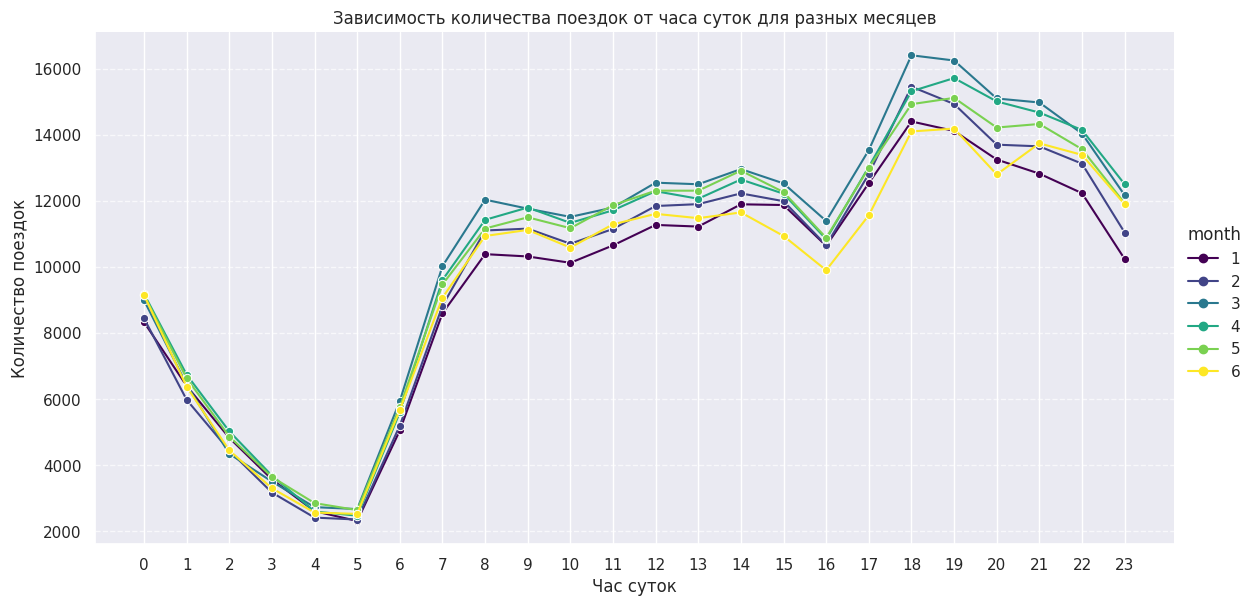

<Figure size 1200x600 with 0 Axes>

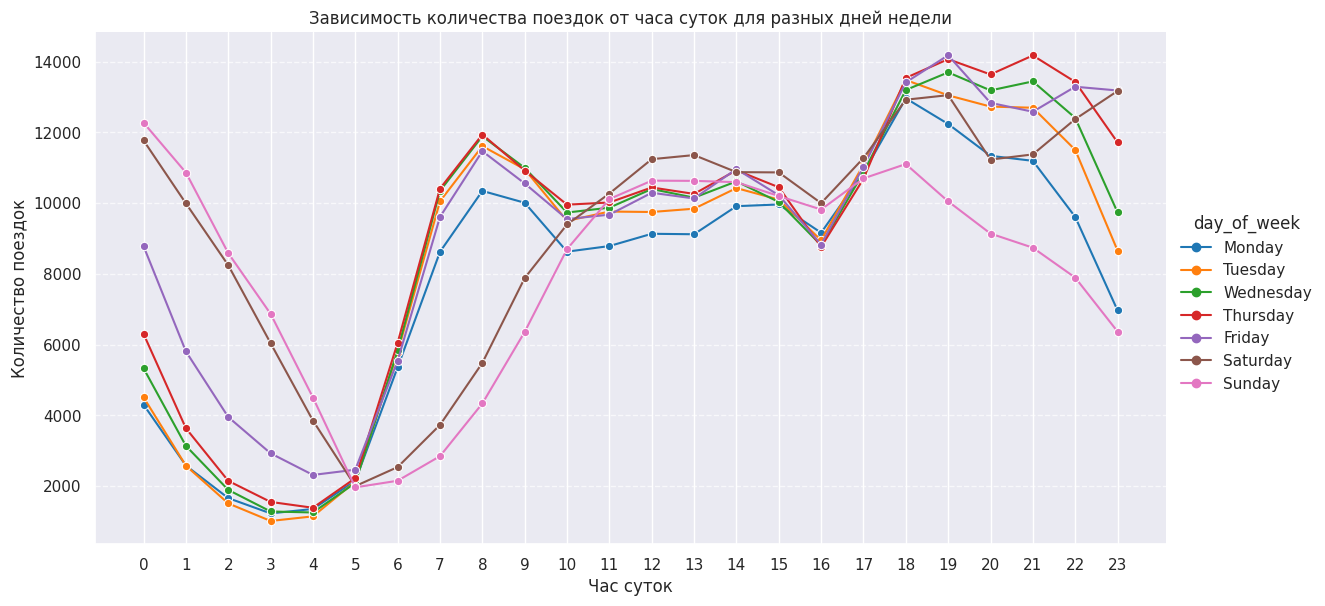

In [ ]:
# Группировка по месяцу и часу суток, подсчет количества поездок
monthly_hourly_trips = df.groupby(['month', 'hour']).size().reset_index(name='trip_count')

# Группировка по дню недели и часу суток, подсчет количества поездок
weekly_hourly_trips = df.groupby(['day_of_week', 'hour']).size().reset_index(name='trip_count')

# Упорядочим дни недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_hourly_trips['day_of_week'] = pd.Categorical(weekly_hourly_trips['day_of_week'], categories=weekday_order, ordered=True)
weekly_hourly_trips = weekly_hourly_trips.sort_values('day_of_week')

# График зависимости количества поездок от часа суток для разных месяцев
plt.figure(figsize=(12, 6))
sns.relplot(
    x='hour', y='trip_count', hue='month', data=monthly_hourly_trips,
    kind='line', marker='o', height=6, aspect=2, palette='viridis'
)
plt.title('Зависимость количества поездок от часа суток для разных месяцев')
plt.xlabel('Час суток')
plt.ylabel('Количество поездок')
plt.xticks(range(24))  # Подписи для каждого часа
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График зависимости количества поездок от часа суток для разных дней недели
plt.figure(figsize=(12, 6))
sns.relplot(
    x='hour', y='trip_count', hue='day_of_week', data=weekly_hourly_trips,
    kind='line', marker='o', height=6, aspect=2, palette='tab10'
)
plt.title('Зависимость количества поездок от часа суток для разных дней недели')
plt.xlabel('Час суток')
plt.ylabel('Количество поездок')
plt.xticks(range(24))  # Подписи для каждого часа
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это может быть связано?

В зимние месяцы (1, 2) количество поездок несколько ниже, особенно в вечерние часы, что может быть связано с более коротким световым днём и менее благоприятными погодными условиями. В весенние и летние месяцы (4, 5, 6) количество поездок увеличивается, особенно в вечерние часы, что может быть связано с более длинным световым днём и улучшением погодных условий.
Второй график показывает зависимость количества поездок от часа суток для разных дней недели. Наблюдается чёткая закономерность: пик количества поездок приходится на утренние (7-9 часов) и вечерние (16-19 часов) часы, что, вероятно, связано с часами пик, когда люди едут на работу и возвращаются домой. В выходные дни (суббота и воскресенье) пик смещается на более поздние утренние часы (10-12 часов), что может быть связано с более поздним началом дня. Ночные часы (0-5 часов) характеризуются минимальным количеством поездок, что ожидаемо из-за низкой активности в это время. Таким образом, график демонстрирует типичные паттерны мобильности, связанные с рабочими и выходными днями.



**Задание 4 [+0.25 балла]**. Разделите данные на обучающую и тестовую выборки в соотношении 80:20 с помощью функции `train_test_split` из библиотеки `sklearn`. На основе обучающей выборки постройте график, показывающий зависимость логарифма среднего времени поездки от дня недели. Повторите этот процесс для часа в сутках и дня в году.

Посмотреть график распределения тренировочной выборки важно по нескольким причинам:

1. **Понимание данных**: Анализ тренировочной выборки помогает лучше понять распределение и характеристики данных, что важно для выбора и настройки моделей машинного обучения

2. **Выявление закономерностей**: Графики зависимостей могут выявить важные закономерности и тренды в данных, которые могут быть использованы для улучшения моделей прогнозирования.

3. **Избежание переобучения**: Анализируя только тренировочную выборку, мы избегаем риска "заглядывания в будущее" и переобучения модели, когда она слишком хорошо подгоняется под тестовые данные.


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)

<ipython-input-26-970709c15b98>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='log_trip_duration', data=weekly_log_duration, palette='viridis')


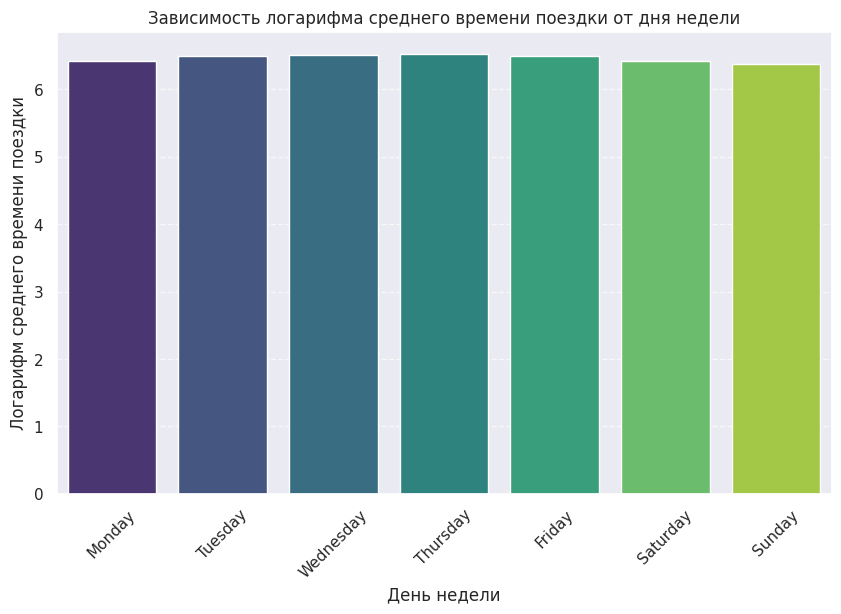

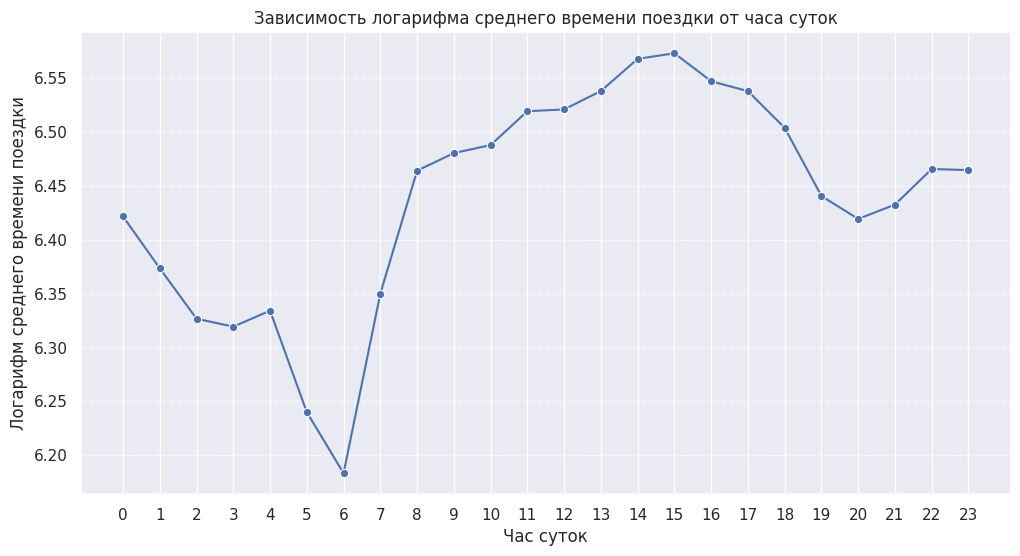

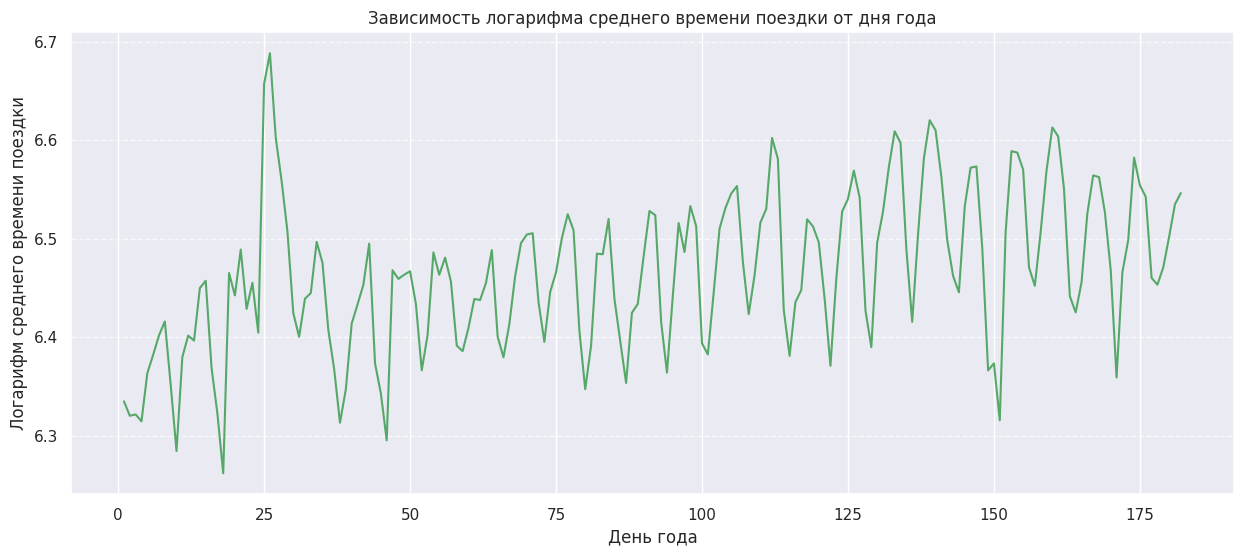

In [ ]:
# Группировка по дню недели и вычисление среднего логарифма продолжительности
weekly_log_duration = train_df.groupby('day_of_week')['log_trip_duration'].mean().reset_index()


# Группировка по часу суток и вычисление среднего логарифма продолжительности
hourly_log_duration = train_df.groupby('hour')['log_trip_duration'].mean().reset_index()

# Группировка по дню года и вычисление среднего логарифма продолжительности
yearly_log_duration = train_df.groupby('day_of_year')['log_trip_duration'].mean().reset_index()

# Упорядочим дни недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_log_duration['day_of_week'] = pd.Categorical(weekly_log_duration['day_of_week'], categories=weekday_order, ordered=True)
weekly_log_duration = weekly_log_duration.sort_values('day_of_week')

# График зависимости логарифма среднего времени поездки от дня недели
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='log_trip_duration', data=weekly_log_duration, palette='viridis')
plt.title('Зависимость логарифма среднего времени поездки от дня недели')
plt.xlabel('День недели')
plt.ylabel('Логарифм среднего времени поездки')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График зависимости логарифма среднего времени поездки от часа суток
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='log_trip_duration', data=hourly_log_duration, marker='o', color='b')
plt.title('Зависимость логарифма среднего времени поездки от часа суток')
plt.xlabel('Час суток')
plt.ylabel('Логарифм среднего времени поездки')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# График зависимости логарифма среднего времени поездки от дня года
plt.figure(figsize=(15, 6))
sns.lineplot(x='day_of_year', y='log_trip_duration', data=yearly_log_duration, color='g')
plt.title('Зависимость логарифма среднего времени поездки от дня года')
plt.xlabel('День года')
plt.ylabel('Логарифм среднего времени поездки')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


График зависимости логарифма среднего времени поездки от часа суток показывает, что среднее время поездки варьируется в течение дня, с пиками в утренние (7-9 часов) и вечерние (16-19 часов) часы, что, вероятно, связано с загруженностью дорог в часы пик. На графике зависимости от дня года наблюдается сезонная изменчивость: время поездок увеличивается в зимние месяцы (дни года 0-50 и 300-365), что может быть связано с ухудшением погодных условий и увеличением времени в пути, и снижается в летние месяцы (дни года 150-250), когда погода более благоприятна для передвижения.


Добавьте следующие признаки на основе `pickup_datetime` (не зря мы преобразовывали это в первых этапах):
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

Разбиение даты на отдельные признаки важно по нескольким причинам:

1. **Выявление временных закономерностей**: Разделение даты на день недели, месяц и час помогает выявить закономерности в данных, связанные с временем суток, днями недели и сезонностью.

2. **Улучшение прогностической способности модели**: Добавление этих признаков может улучшить точность моделей машинного обучения, поскольку они могут захватывать важные временные зависимости в данных.

3. **Адаптация к аномальным событиям**: Бинарные признаки, указывающие на аномальные периоды, позволяют модели учитывать особые ситуации, которые могут существенно отличаться от обычных условий.

4. **Повышение интерпретируемости**: Разбиение даты на отдельные компоненты делает модель более интерпретируемой, позволяя легче понять, как различные временные факторы влияют на целевую переменную.

In [ ]:
# Признаки дня недели, месяца, час и номера дня в году уже добавлены

# Добавим аномалии

daily_trips = df.groupby(df['date']).size().reset_index(name='trip_count')
daily_trips

date  trip_count
0    2016-01-01        7162
1    2016-01-02        6512
2    2016-01-03        6353
3    2016-01-04        6725
4    2016-01-05        7204
..          ...         ...
177  2016-06-26        7084
178  2016-06-27        7311
179  2016-06-28        7253
180  2016-06-29        7623
181  2016-06-30        7588

[182 rows x 2 columns]

In [ ]:
# Вычислим среднее количество поездок и стандартное отклонение
mean_trips = daily_trips['trip_count'].mean()
std_trips = daily_trips['trip_count'].std()

# Определим аномальные даты, как даты отличающиеся от среднего на 2 стандартных отклонения
anomalies = daily_trips[(daily_trips['trip_count'] < (mean_trips - 2 * std_trips)) |
                        (daily_trips['trip_count'] > (mean_trips + 2 * std_trips)) ]

# Добавляем бинарный признак 'anomaly' в df
df['anomaly'] = df['date'].isin(anomalies['date']).astype(int) # 1 - аномалия      0 - не аномалия
df['anomaly'].value_counts().reset_index()

anomaly    count
0        0  1441959
1        1    16685

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_year', 'day_of_week', 'hour', 'month',
       'date', 'anomaly'],
      dtype='object')

Признаки: passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_duration, log_trip_duration, day_of_year, , hour рассматрим как числовые, так как они представляют собой непрерывные или дискретные величины. Признаки:  vendor_id, store_and_fwd_flag, day_of_week, month и anomaly рассмаотрим как категориальные, т.к. они не имеют числового порядка. Некоторые признаки, такие как day_of_week, hour, month, можно обрабатывать как числовые или категориальные

**Задание 5 [+0.375 балла]**.
Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

Применение `OneHotEncoder` и `StandardScaler` важно по следующим причинам:

1. **OneHotEncoder для категориальных признаков**: Категориальные признаки необходимо преобразовать в числовой формат перед использованием в линейной регрессии. `OneHotEncoder` преобразует категориальные переменные в бинарные векторы, что позволяет модели корректно интерпретировать эти признаки без внесения искажений, связанных с порядком значений.

2. **StandardScaler для численных признаков**: Масштабирование численных признаков с помощью `StandardScaler` помогает стандартизировать данные, приводя их к одному масштабу с нулевым средним и единичным стандартным отклонением. Это улучшает интерпретацию весов линейной модели (а также мы обсудим на лекции, почему это ускоряет обучение модели)


In [ ]:
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
0               40.765602                  N            455   
1               40.731152                  N            663   
2               40.710087                  N           2124   
3               40.706718                  N            429   
4               40.782520                  N            435   
...                   ...                ...            ...   
1458639         40.740170                  N            778   
1458640         40.796547                  N            655   
1458641         40.707371                  N            764   
1458642         40.757107                  N            373   
1458643         40.790585                  N            198   

         log_trip_duration        date  anomaly  day_of_year day_of_week  \
0                 6.122493  2016-03-14        0           74      Monday   
1                 6.498282  2016-06-12        0          164      Sunday   
2                 7.661527  2016-01-19        0           19     Tuesday   
3                 6.063785  2016-04-06        0           97   Wednesday   
4                 6.077642  2016-03-26        0           86    Saturday   
...                    ...         ...      ...          ...         ...   
1458639           6.658011  2016-04-08        0           99      Friday   
1458640           6.486161  2016-01-10        0           10      Sunday   
1458641           6.639876  2016-04-22        0          113      Friday   
1458642           5.924256  2016-01-05        0            5     Tuesday   
1458643           5.293305  2016-04-05        0           96     Tuesday   

         hour  month  
0          17      3  
1           0      6  
2          11      1  
3          19      4  
4          13      3  
...       ...    ...  
1458639    13      4  
1458640     7      1  
1458641     6      4  
1458642    15      1  
1458643    14      4  

[1458644 rows x 17 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge



# Ограничимся только категориальными признаками, которые мы создали
cat_features = ['day_of_week', 'month', 'anomaly']
num_features = ['day_of_year', 'hour']



X = df[cat_features + num_features]
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создание ColumnTransformer для обработки признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),  # Кодирование категориальных признаков
        ('num', StandardScaler(), num_features)                         # Масштабирование числовых признаков
    ])

# Создание пайплайна
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())                                              # Ridge регрессия  параметры по умолчанию
])

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)



def rmsle(log1p_y_true, log1p_y_pred):
    rmsle = np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))
    return rmsle

# Оценка качества с помощью RMSLE
rmsle_score = rmsle(y_test, y_pred)

# Предсказание  в исходной шкале  в  процентах
rmsle_score_original = np.expm1(rmsle_score) * 100


print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')
print(f'Ошибка в процентах на тестовой выборке: {rmsle_score_original:.2f}%')

RMSLE на тестовой выборке: 0.7906
Ошибка в процентах на тестовой выборке: 120.46%


## Часть 2. Изучаем координаты & Обучаем модель [+1.5 балла]




Теперь, когда мы подробно изучили временные аспекты данных о поездках, давайте переключим наше внимание на географические данные, а именно на координаты начала и конца поездок. Мы предоставили вам функцию, которая отображает на карте точки начала или конца поездок. Однако обратите внимание, что для эффективности этой функции мы используем только небольшой фрагмент данных, иначе обработка займет слишком много времени.

Анализ координат важен по нескольким причинам:

1. **Пространственный анализ**: Координаты позволяют проводить пространственный анализ, который может выявить географические закономерности в данных, такие как популярные места отправления и назначения, районы с высоким спросом и т. д.

2. **Улучшение точности прогнозов**: Включение географических признаков в модели прогнозирования может повысить их точность, поскольку координаты могут быть связаны с различными факторами, влияющими на длительность поездок и спрос на транспортные услуги.

In [ ]:
# Выберем небольшой фрагмент данных для визуализации
sample_size = 100
sample_data = df.head(sample_size)

# Функция для отображения кругов на карте
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    Рисует карту с кругами, представляющими точки данных.

    Параметры
    ----------
    data : DataFrame
        DataFrame, содержащий колонки с широтой и долготой.
    latitude_column : str
        Название колонки в DataFrame, содержащей координаты широты.
    longitude_column : str
        Название колонки в DataFrame, содержащей координаты долготы.
    color : str
        Цвет кругов, которые будут нарисованы на карте.

    Возвращает
    -------
    folium.Map
        Объект карты Folium с нарисованными кругами в указанных координатах.

    Примеры
    --------
    >>> import pandas as pd
    >>> data = pd.DataFrame({
    ...     'latitude': [37.773972, 37.774159],
    ...     'longitude': [-122.431297, -122.431297]
    ... })
    >>> show_circles_on_map(data, 'latitude', 'longitude', 'blue')
    """
    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location, zoom_start=12)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

# Визуализация точек начала поездок
pickup_map = show_circles_on_map(sample_data, 'pickup_latitude', 'pickup_longitude', 'blue')
# Отображаем карту
pickup_map

# Визуализация точек конца поездок
dropoff_map = show_circles_on_map(sample_data, 'dropoff_latitude', 'dropoff_longitude', 'red')
# Отображаем карту
dropoff_map

In [ ]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Выделяется район Манхэттен — это финансовый и деловой центр города, где сосредоточено множество офисов, бизнесов, туристических достопримечательностей, ресторанов и магазинов. Это приводит к высокой плотности поездок такси, особенно в нижней части острова.
Сюда часто прибывают туристы, что также увеличивает количество поездок, что делает этот район очень плотным и насыщенным по количеству такси.
В его южной части, сосредоточено большое количество людей, что увеличивает потребность в такси. Это также может привести к большому количеству коротких поездок, особенно в часы пик, когда люди перемещаются по небольшим расстояниям, например, между деловыми центрами, ресторанами и отелями.

**Задание 6 [+0.375 балла]**. Как нам хорошо известно, время поездки $t$ связано с расстоянием $s$ и средней скоростью $v_{\text{ср}}$ соотношением $t = s / v_{\text{ср}}$. Из этого следует, что расстояние между начальной и конечной точками поездки является одним из ключевых факторов, влияющих на время поездки. Хотя мы не можем точно определить полный маршрут, который преодолеет такси, мы можем оценить это расстояние, рассчитав кратчайшее расстояние между точками начала и конца поездки. Для корректного вычисления расстояния между двумя точками на поверхности Земли можно использовать функцию `haversine`. Рассчитайте кратчайшее расстояние для каждого объекта в данных и сохраните его в колонку `haversine`.

Это важно по нескольким причинам:

1. **Улучшение точности модели**: Включение расстояния как признака в модель может значительно улучшить точность прогнозирования времени поездки, поскольку оно напрямую влияет на длительность поездки.

2. **Понимание взаимосвязей**: Анализ зависимости времени поездки от расстояния может помочь выявить взаимосвязи и закономерности в данных, что полезно для понимания динамики транспортных потоков.


In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Вычисляет расстояние между двумя точками на поверхности Земли
    с использованием формулы Haversine.

    Параметры
    ----------
    lat1, lon1 : float
        Широта и долгота первой точки (в градусах).
    lat2, lon2 : float
        Широта и долгота второй точки (в градусах).

    Возвращает
    -------
    float
        Расстояние между точками в километрах.
    """
    # Преобразуем градусы в радианы
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Разница широт и долгот
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Формула Haversine
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    # Радиус Земли в километрах
    r = 6371
    return c * r

In [ ]:
df['haversine'] = df.apply(
    lambda row: haversine(
        row['pickup_latitude'], row['pickup_longitude'],
        row['dropoff_latitude'], row['dropoff_longitude']
    ),
    axis=1
)


df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration  day_of_year  \
0                  N            455           6.122493           74   
1                  N            663           6.498282          164   
2                  N           2124           7.661527           19   
3                  N            429           6.063785           97   
4                  N            435           6.077642           86   

  day_of_week  hour  month        date  anomaly  haversine  
0      Monday    17      3  2016-03-14        0   1.498521  
1      Sunday     0      6  2016-06-12        0   1.805507  
2     Tuesday    11      1  2016-01-19        0   6.385098  
3   Wednesday    19      4  2016-04-06        0   1.485498  
4    Saturday    13      3  2016-03-26        0   1.188588

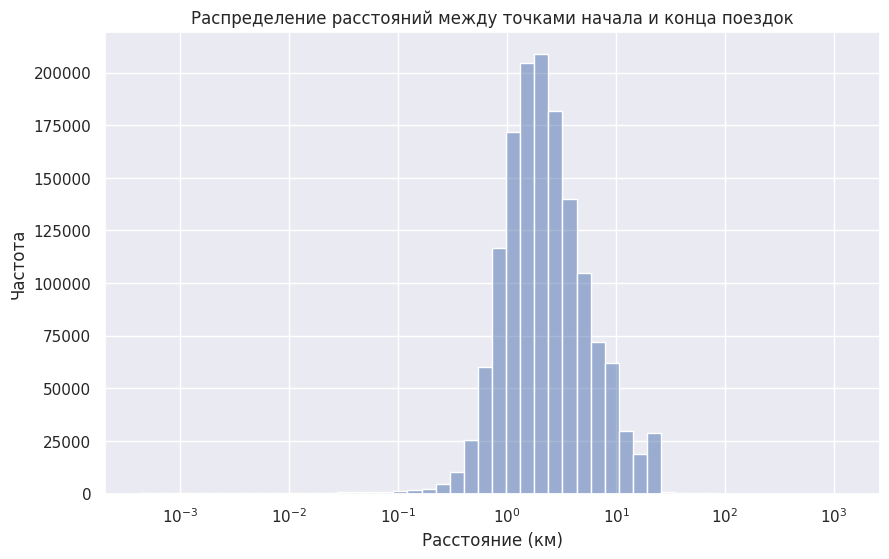

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['haversine'], bins=50, kde=True, log_scale=True)
plt.title('Распределение расстояний между точками начала и конца поездок')
plt.xlabel('Расстояние (км)')
plt.ylabel('Частота')
plt.show()

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [ ]:
df['log_haversine'] = np.log1p(df['haversine'])

df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration  day_of_year  \
0                  N            455           6.122493           74   
1                  N            663           6.498282          164   
2                  N           2124           7.661527           19   
3                  N            429           6.063785           97   
4                  N            435           6.077642           86   

  day_of_week  hour  month        date  anomaly  haversine  log_haversine  
0      Monday    17      3  2016-03-14        0   1.498521       0.915699  
1      Sunday     0      6  2016-06-12        0   1.805507       1.031584  
2     Tuesday    11      1  2016-01-19        0   6.385098       1.999464  
3   Wednesday    19      4  2016-04-06        0   1.485498       0.910473  
4    Saturday    13      3  2016-03-26        0   1.188588       0.783257

In [ ]:
assert (df['haversine'] > 0).all(), "Расстояние должно быть положительным!"

AssertionError: Расстояние должно быть положительным!

In [ ]:
# Замена нулевых и отрицательных значений на 0.001
df['haversine'] = df['haversine'].replace(0, 0.001)  # Заменяем нули
df['haversine'] = df['haversine'].apply(lambda x: max(x, 0.001))  # Заменяем отрицательные значения

In [ ]:
# Вычисляем логарифм расстояния
df['log_haversine'] = np.log1p(df['haversine'])

In [ ]:
assert (df['haversine'] > 0).all(), "Расстояние должно быть положительным!"

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [ ]:
assert df['log_haversine'].corr(df['log_trip_duration']) > df['haversine'].corr(df['log_trip_duration'])
print(f"Корреляция log_haversine с log_trip_duration: {df['log_haversine'].corr(df['log_trip_duration']):.4f}")
print(f"Корреляция haversine с log_trip_duration: {df['haversine'].corr(df['log_trip_duration']):.4f}")

Корреляция log_haversine с log_trip_duration: 0.7499
Корреляция haversine с log_trip_duration: 0.5736


**Задание 7 [+0.375 балла]**. Давайте проанализируем среднюю скорость движения такси. Для каждого объекта в обучающей выборке вычислите среднюю скорость, разделив значение в колонке `haversine` на значение в колонке `trip_duration`. Затем постройте гистограмму распределения полученных значений средней скорости.


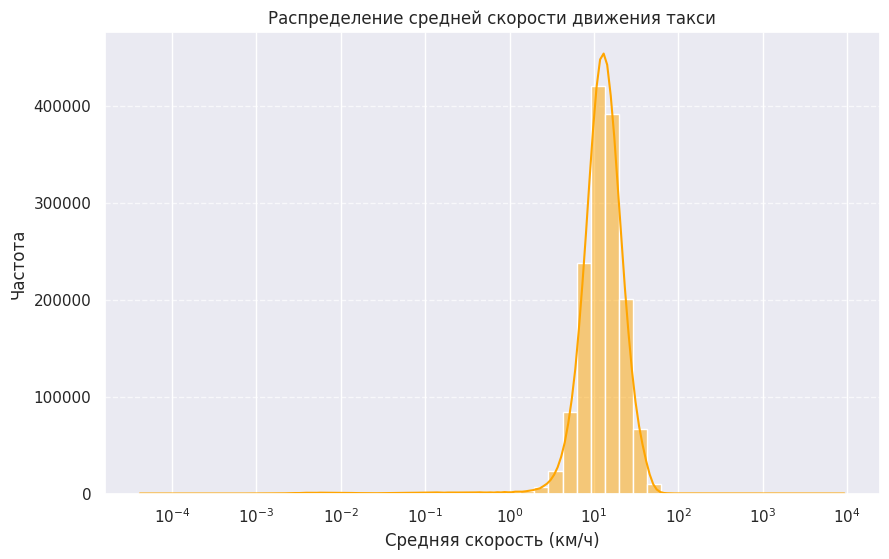

In [ ]:
# Вычисляем среднюю скорость (в км/ч)
df['avg_speed'] = df['haversine'] / (df['trip_duration'] / 3600)  # Переводим секунды в часы

# Построение гистограммы распределения средней скорости
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_speed'], bins=50, kde=True, color='orange', log_scale=True)
plt.title('Распределение средней скорости движения такси')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

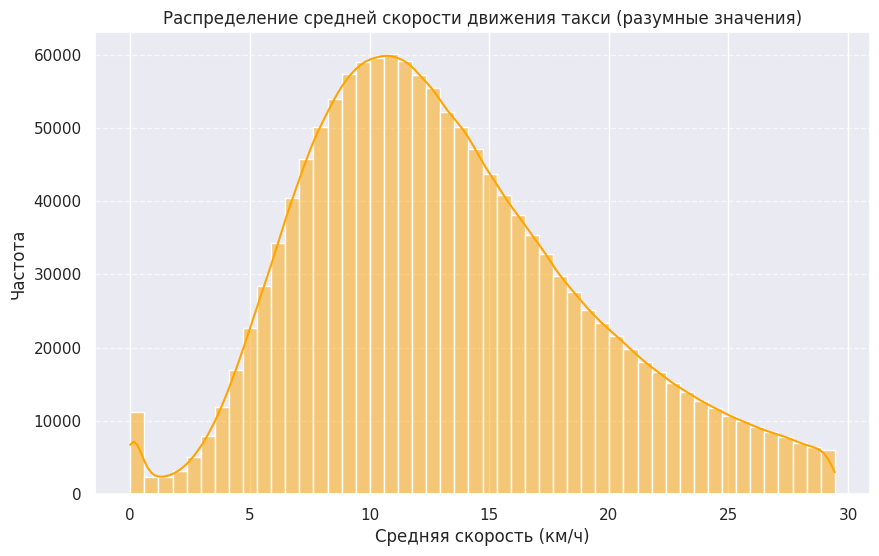

In [ ]:
# Определяем 95-ю квантиль скорости
speed_quantile = df['avg_speed'].quantile(0.95)

# Фильтруем данные, оставляя только объекты с разумными скоростями
need_speed = df[df['avg_speed'] < speed_quantile]

# Построение гистограммы распределения средней скорости
plt.figure(figsize=(10, 6))
sns.histplot(need_speed['avg_speed'], bins=50, kde=True, color='orange')
plt.title('Распределение средней скорости движения такси (разумные значения)')
plt.xlabel('Средняя скорость (км/ч)')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df = df.drop(columns = 'avg_speed')
df.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  log_trip_duration  day_of_year  \
0                  N            455           6.122493           74   
1                  N            663           6.498282          164   
2                  N           2124           7.661527           19   
3                  N            429           6.063785           97   
4                  N            435           6.077642           86   

  day_of_week  hour  month        date  anomaly  haversine  log_haversine  
0      Monday    17      3  2016-03-14        0   1.498521       0.915699  
1      Sunday     0      6  2016-06-12        0   1.805507       1.031584  
2     Tuesday    11      1  2016-01-19        0   6.385098       1.999464  
3   Wednesday    19      4  2016-04-06        0   1.485498       0.910473  
4    Saturday    13      3  2016-03-26        0   1.188588       0.783257

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Есть риск переобучения. Если скорость предоставляется в качестве признака и она имеет очень высокую корреляцию с целевой переменной, модель может просто "запомнить" этот признак и плохо работать на новых данных. Она будет слишком сильно полагаться на скорость, вместо того, чтобы учесть более разнообразные факторы, влияющие на результат.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 8 [+0.625 балла]**. Сейчас мы практически не используем прямые значения координат в анализе. Это связано с тем, что широта и долгота по отдельности не несут значимой информации, а их взаимосвязь с целевой переменной нелинейна. Чтобы эффективно интегрировать координаты в наш анализ, мы можем применить следующий подход: окружим область с наибольшим количеством поездок прямоугольником и разделим этот прямоугольник на ячейки. Каждой точке присвоим номер ячейки, в которой она находится, а точкам вне прямоугольника присвоим значение -1.

Создайте трансформер, который вначале делит указанную область на ячейки, а затем генерирует два признака: номер ячейки начала поездки и номер ячейки конца поездки. Выбор количества строк и столбцов оставьте на ваше усмотрение.

Важно, чтобы все вычисления были векторизованными, трансформер не изменял исходный набор данных, а все необходимые статистики вычислялись только по обучающей выборке в методе `fit`.

Этот подход важен по следующим причинам:

1. **Учет пространственной структуры**: Разбиение на ячейки позволяет учесть пространственную структуру данных, что может улучшить качество анализа и прогнозирования.

2. **Снижение размерности**: Преобразование координат в номера ячеек уменьшает размерность данных, что упрощает анализ и сокращает время вычислений.

3. **Улучшение интерпретируемости**: Номера ячеек могут быть более интерпретируемыми, чем сырые координаты, что облегчает понимание взаимосвязей в данных.

4. **Адаптация к нелинейным зависимостям**: Такой подход позволяет адаптироваться к нелинейным зависимостям между координатами и целевой переменной, что может повысить точность моделей.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TripGridTransformer(BaseEstimator, TransformerMixin):
    """
    Трансформер для преобразования географических координат начала и конца поездки в номера ячеек сетки.

    Параметры
    ----------
    n_rows : int
        Количество строк сетки.
    n_cols : int
        Количество столбцов сетки.
    lat_min : float
        Минимальная широта области.
    lat_max : float
        Максимальная широта области.
    lon_min : float
        Минимальная долгота области.
    lon_max : float
        Максимальная долгота области.

    Атрибуты
    ----------
    cell_size_lat : float
        Размер ячейки сетки по широте.
    cell_size_lon : float
        Размер ячейки сетки по долготе.
    """

    def __init__(self, n_rows, n_cols, lat_min, lat_max, lon_min, lon_max):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_min = lat_min
        self.lat_max = lat_max
        self.lon_min = lon_min
        self.lon_max = lon_max
        self.cell_size_lat = None
        self.cell_size_lon = None

    def fit(self, X=None, y=None):
        """
        Находит параметры сетки на основе данных.

        Параметры
        ----------
        X : Ignored
            Не используется, существует для совместимости со стандартами sklearn.
        y : Ignored
            Не используется, существует для совместимости со стандартами sklearn.

        Возвращает
        -------
        self : object
            Возвращает себя.
        """
        # Вычисляем размеры ячеек сетки
        self.cell_size_lat = (self.lat_max - self.lat_min) / self.n_rows
        self.cell_size_lon = (self.lon_max - self.lon_min) / self.n_cols
        return self

    def transform(self, X):
        """
        Преобразует координаты начала и конца поездки в номера ячеек сетки.

        Параметры
        ----------
        X : array-like, shape [n_samples, 4]
            Входные данные с координатами (широта начала, долгота начала, широта конца, долгота конца).

        Возвращает
        -------
        X_transformed : array, shape [n_samples, 2]
            Преобразованные данные с номерами ячеек (номер ячейки начала, номер ячейки конца).
        """
        # Извлекаем координаты начала и конца поездки
        lat_start, lon_start = X[:, 0], X[:, 1]
        lat_end, lon_end = X[:, 2], X[:, 3]

        # Преобразуем координаты начала в номера ячеек
        row_start = ((lat_start - self.lat_min) / self.cell_size_lat).astype(int)
        col_start = ((lon_start - self.lon_min) / self.cell_size_lon).astype(int)

        # Преобразуем координаты конца в номера ячеек
        row_end = ((lat_end - self.lat_min) / self.cell_size_lat).astype(int)
        col_end = ((lon_end - self.lon_min) / self.cell_size_lon).astype(int)

        # Ограничиваем номера ячеек в пределах сетки
        row_start = np.clip(row_start, 0, self.n_rows - 1)
        col_start = np.clip(col_start, 0, self.n_cols - 1)
        row_end = np.clip(row_end, 0, self.n_rows - 1)
        col_end = np.clip(col_end, 0, self.n_cols - 1)

        # Точки вне области получают значение -1
        outside_start = (lat_start < self.lat_min) | (lat_start > self.lat_max) | (lon_start < self.lon_min) | (lon_start > self.lon_max)
        outside_end = (lat_end < self.lat_min) | (lat_end > self.lat_max) | (lon_end < self.lon_min) | (lon_end > self.lon_max)
        row_start[outside_start] = -1
        col_start[outside_start] = -1
        row_end[outside_end] = -1
        col_end[outside_end] = -1

        # Возвращаем номера ячеек начала и конца
        return np.column_stack((row_start * self.n_cols + col_start, row_end * self.n_cols + col_end))

    def show_map(self):
        """
        Отображает карту с ячейками сетки.
        """
        # Создаем карту
        map_center = [(self.lat_min + self.lat_max) / 2, (self.lon_min + self.lon_max) / 2]
        m = folium.Map(location=map_center, zoom_start=12)

        # Рисуем ячейки сетки
        for i in range(self.n_rows):
            for j in range(self.n_cols):
                lat_min = self.lat_min + i * self.cell_size_lat
                lat_max = lat_min + self.cell_size_lat
                lon_min = self.lon_min + j * self.cell_size_lon
                lon_max = lon_min + self.cell_size_lon

                # Координаты углов прямоугольника
                bounds = [(lat_min, lon_min), (lat_max, lon_max)]
                folium.Rectangle(
                    bounds,
                    color='blue',
                    fill=True,
                    fill_opacity=0.1,
                    popup=f'Row: {i}, Col: {j}'
                ).add_to(m)

        # Отображаем карту
        return m



n_rows = 5  # Количество строк сетки
n_cols = 5  # Количество столбцов сетки
lat_min, lat_max = 40.5, 40.9  # Минимальная и максимальная широта
lon_min, lon_max = -74.2, -73.7  # Минимальная и максимальная долгота

# Создаем объект TripGridTransformer
transformer = TripGridTransformer(n_rows, n_cols, lat_min, lat_max, lon_min, lon_max)

# Вычисляем размеры ячеек сетки
transformer.fit()

# Подготавливаем данные для трансформера
X = df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].values

# Преобразуем координаты в номера ячеек
X_transformed = transformer.transform(X)

# Добавляем новые признаки в DataFrame
df['pickup_cell'] = X_transformed[:, 0]  # Номер ячейки начала поездки
df['dropoff_cell'] = X_transformed[:, 1]  # Номер ячейки конца поездки

map_object = transformer.show_map()
map_object

In [ ]:
df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  ...  day_of_year  \
0               40.765602                  N            455  ...           74   
1               40.731152                  N            663  ...          164   
2               40.710087                  N           2124  ...           19   
3               40.706718                  N            429  ...           97   
4               40.782520                  N            435  ...           86   
...                   ...                ...            ...  ...          ...   
1458639         40.740170                  N            778  ...           99   
1458640         40.796547                  N            655  ...           10   
1458641         40.707371                  N            764  ...          113   
1458642         40.757107                  N            373  ...            5   
1458643         40.790585                  N            198  ...           96   

         day_of_week hour  month        date anomaly  haversine  \
0             Monday   17      3  2016-03-14       0   1.498521   
1             Sunday    0      6  2016-06-12       0   1.805507   
2            Tuesday   11      1  2016-01-19       0   6.385098   
3          Wednesday   19      4  2016-04-06       0   1.485498   
4           Saturday   13      3  2016-03-26       0   1.188588   
...              ...  ...    ...         ...     ...        ...   
1458639       Friday   13      4  2016-04-08       0   1.225080   
1458640       Sunday    7      1  2016-01-10       0   6.049836   
1458641       Friday    6      4  2016-04-22       0   7.824606   
1458642      Tuesday   15      1  2016-01-05       0   1.092564   
1458643      Tuesday   14      4  2016-04-05       0   1.134042   

         log_haversine  pickup_cell  dropoff_cell  
0             0.915699           17            17  
1             1.031584           12            12  
2             1.999464           17            11  
3             0.910473           11            11  
4             0.783257           17            17  
...                ...          ...           ...  
1458639       0.799793           17            17  
1458640       1.953004           16            17  
1458641       2.177544           17            11  
1458642       0.738390           17            17  
1458643       0.758018           17         

**Задание 9 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_year', 'day_of_week', 'hour', 'month',
       'date', 'anomaly', 'haversine', 'log_haversine', 'pickup_cell',
       'dropoff_cell'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge


# Признаки
cat_features = ['day_of_week', 'month', 'anomaly']
num_features = ['day_of_year', 'hour', 'haversine', 'log_haversine', 'pickup_cell', 'dropoff_cell']



X = df[cat_features + num_features]
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создание ColumnTransformer для обработки признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),  # Кодирование категориальных признаков
        ('num', StandardScaler(), num_features)                         # Масштабирование числовых признаков
    ])

# Создание пайплайна
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())                                              # Ridge регрессия  параметры по умолчанию
])


# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)


def rmsle(log1p_y_true, log1p_y_pred):
    rmsle = np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))
    return rmsle

# Оценка качества с помощью RMSLE
rmsle_score = rmsle(y_test, y_pred)

# Предсказание в  исходной шкале
rmsle_score_original = np.expm1(rmsle_score) * 100

print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')
print(f'Ошибка в процентах на тестовой выборке: {rmsle_score_original:.2f}%')

RMSLE на тестовой выборке: 0.5102
Ошибка в процентах на тестовой выборке: 66.57%


Признаки haversine и log_haversine, pickup_cell, dropoff_cell дают значительное улучшение модели

## Часть 3. Изучаем оставшиеся признаки & Обучаем модель [+0.5 балла]


**Задание 10 [+0.375 балла]**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
print("Уникальные значения vendor_id:", df['vendor_id'].nunique())
print("Уникальные значения passenger_count:", df['passenger_count'].nunique())
print("Уникальные значения store_and_fwd_flag:", df['store_and_fwd_flag'].nunique())

Уникальные значения vendor_id: 2
Уникальные значения passenger_count: 10
Уникальные значения store_and_fwd_flag: 2


Признаки vendor_id, passenger_count и store_and_fwd_flag могут быть важны для модели, так как они содержат информацию, которая может влиять на длительность поездки. vendor_id отражает различия между поставщиками услуг, такие как тарифы, качество данных или популярность в определённое время, что может помочь модели учитывать специфику каждого поставщика. passenger_count указывает на количество пассажиров, что может влиять на время поездки из-за дополнительных остановок или особенностей групповых заказов. store_and_fwd_flag показывает, была ли поездка записана позже из-за потери связи, что может указывать на качество данных или географические особенности, такие как районы с плохим покрытием. Эти признаки, если их правильно обработать, могут улучшить предсказательную способность модели, учитывая дополнительные контекстные факторы.

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

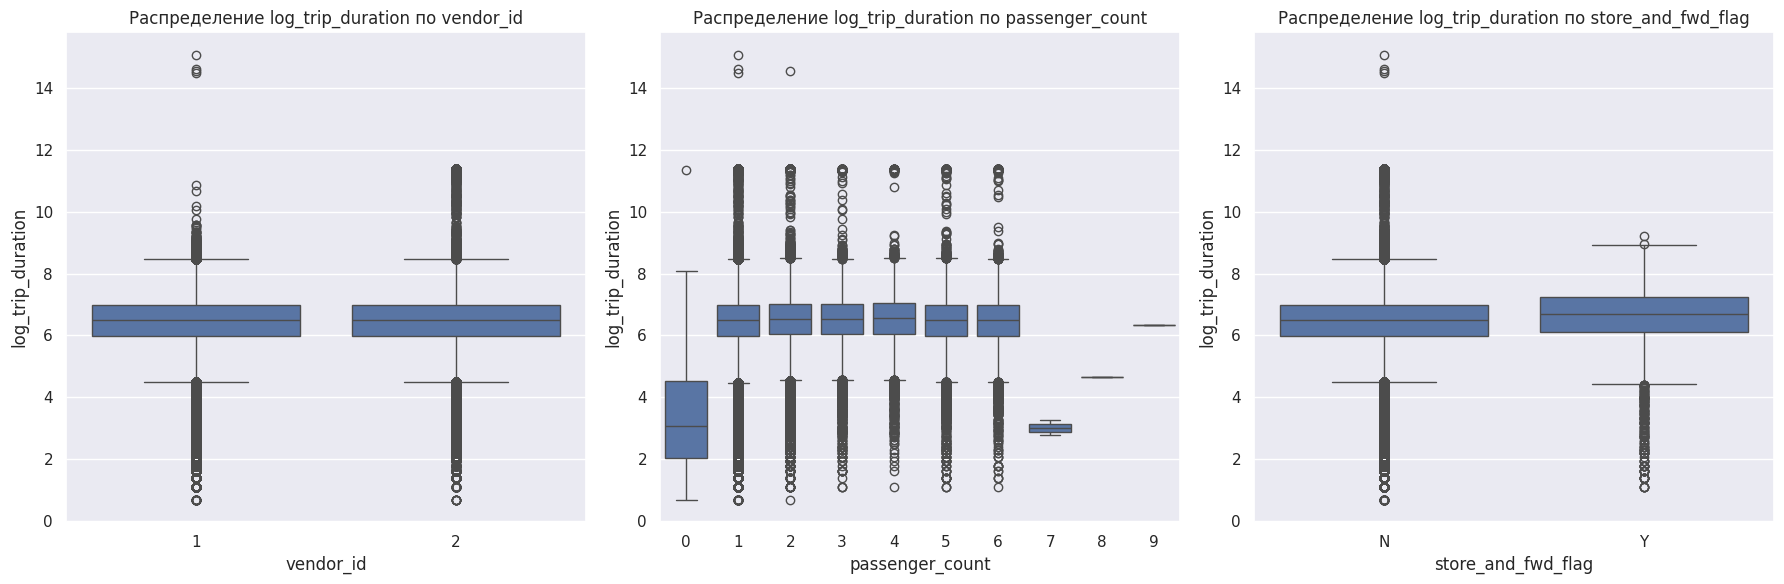

In [ ]:
# Создаем фигуру с тремя подграфиками
plt.figure(figsize=(18, 6))

# 1. Ящик с усами для vendor_id
plt.subplot(1, 3, 1)
sns.boxplot(x='vendor_id', y='log_trip_duration', data=df)
plt.title('Распределение log_trip_duration по vendor_id')
plt.xlabel('vendor_id')
plt.ylabel('log_trip_duration')

# 2. Ящик с усами для passenger_count
plt.subplot(1, 3, 2)
sns.boxplot(x='passenger_count', y='log_trip_duration', data=df)
plt.title('Распределение log_trip_duration по passenger_count')
plt.xlabel('passenger_count')
plt.ylabel('log_trip_duration')

# 3. Ящик с усами для store_and_fwd_flag
plt.subplot(1, 3, 3)
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=df)
plt.title('Распределение log_trip_duration по store_and_fwd_flag')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('log_trip_duration')

# Отображаем графики
plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
print("Уникальные значения vendor_id:", df['vendor_id'].unique())
print("Уникальные значения store_and_fwd_flag:", df['store_and_fwd_flag'].unique())

Уникальные значения vendor_id: [2 1]
Уникальные значения store_and_fwd_flag: ['N' 'Y']


In [ ]:
# Преобразование vendor_id
df['vendor_id'] = df['vendor_id'].replace({1: 0, 2: 1})

# Преобразование store_and_fwd_flag
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})


print("Уникальные значения vendor_id :", df['vendor_id'].unique())
print("Уникальные значения store_and_fwd_flag :", df['store_and_fwd_flag'].unique())

Уникальные значения vendor_id : [1 0]
Уникальные значения store_and_fwd_flag : [0 1]


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

На основе представленных графиков можно сделать вывод, что признаки vendor_id, passenger_count и store_and_fwd_flag могут быть полезными, но их сила зависит от характера распределения log_trip_duration. Если графики показывают значительные различия в распределении log_trip_duration для разных значений этих признаков, то они могут быть сильными предикторами. Например, если vendor_id показывает явные различия в средних значениях log_trip_duration для разных поставщиков, это может указывать на их важность. Аналогично, если passenger_count и store_and_fwd_flag демонстрируют заметные закономерности в распределении длительности поездок, они также могут быть полезными. Однако, если различия незначительны, их влияние на модель может быть ограниченным.

**Задание 11 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_year', 'day_of_week', 'hour', 'month',
       'date', 'anomaly', 'haversine', 'log_haversine', 'pickup_cell',
       'dropoff_cell'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error


# Признаки
cat_features = [ 'vendor_id', 'store_and_fwd_flag']
num_features = ['passenger_count']


X = df[cat_features + num_features]
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создание ColumnTransformer для обработки признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),  # Кодирование категориальных признаков
        ('num', StandardScaler(), num_features)                         # Масштабирование числовых признаков
    ])

# Создание пайплайна
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())                                              # Ridge регрессия  параметры по умолчанию
])


# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)



def rmsle(log1p_y_true, log1p_y_pred):
    rmsle = np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))
    return rmsle

# Оценка качества с помощью RMSLE
rmsle_score = rmsle(y_test, y_pred)

# Предсказание в  исходной шкале
rmsle_score_original = np.expm1(rmsle_score) * 100

print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')
print(f'Ошибка в процентах на тестовой выборке: {rmsle_score_original:.2f}%')

RMSLE на тестовой выборке: 0.7951
Ошибка в процентах на тестовой выборке: 121.48%


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Признаки vendor_id, passenger_count и store_and_fwd_flag не дали значительного улучшения модели,они предсказывают среднее знаачение. Отбросим эти признаки в следующей модели

## Часть 4. Улучшаем модель [+1.5 балла]

**Задание 12 [+0.5 балла]**. В нашем наборе данных присутствуют аномальные записи: объекты с необычно коротким временем поездки, слишком большим пройденным расстоянием или с большими остатками после регрессии. В этом задании предлагается исключить такие объекты из обучающего набора. Для этого постройте гистограммы распределения указанных величин, определите объекты, которые можно считать выбросами, и очистите __обучающий набор__ от них.

Следует отметить, что, несмотря на то что эти объекты кажутся выбросами, в тестовом наборе данных также могут присутствовать объекты с аналогичными аномальными значениями. Поэтому удаление выбросов из обучающего набора может привести к ухудшению качества на тестовом наборе. Однако, в целом, рекомендуется удалять выбросы из обучающего набора, чтобы получить более разумную и интерпретируемую модель.

Для определения выбросов можно использовать различные методы, такие как:

- **Z-оценка**: Выбросы определяются как объекты, у которых абсолютное значение Z-оценки (стандартизированное значение) превышает определенный порог (например, 3).

- **IQR (межквартильный размах)**: Выбросы определяются как объекты, значения которых выходят за пределы [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], где Q1 и Q3 — первый и третий квартили соответственно.


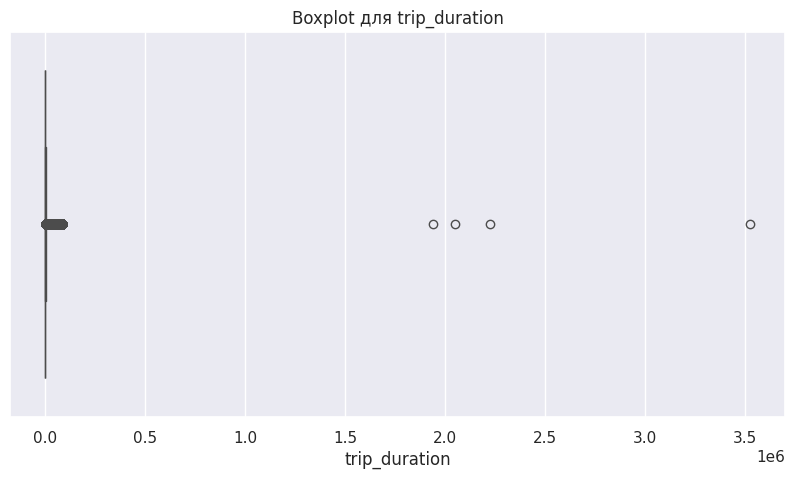

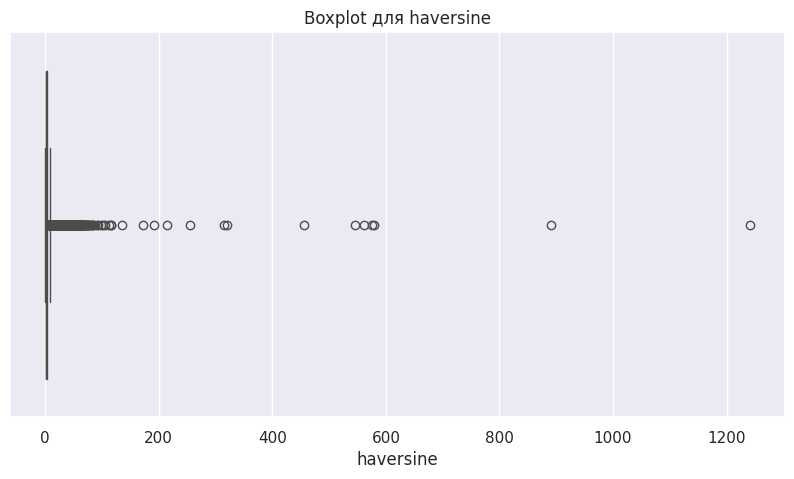

In [ ]:
# Визуализация выбросов
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['trip_duration'])
plt.title('Boxplot для trip_duration')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['haversine'])
plt.title('Boxplot для haversine')
plt.show()


In [ ]:
# Вычисляем квартили и IQR для времени поездки
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

# Вычисляем квартили и IQR для расстояния
Q1_haversine = df['haversine'].quantile(0.25)
Q3_haversine = df['haversine'].quantile(0.75)
IQR_haversine = Q3_haversine - Q1_haversine

# Определяем выбросы
outliers = df[
    (df['trip_duration'] < (Q1 - 1.5 * IQR)) |
    (df['trip_duration'] > (Q3 + 1.5 * IQR)) |
    (df['haversine'] < (Q1_haversine - 1.5 * IQR_haversine)) |
    (df['haversine'] > (Q3_haversine + 1.5 * IQR_haversine))
]
print("Количество выбросов по IQR:", len(outliers))

Количество выбросов по IQR: 158650


In [ ]:
# Удаляем выбросы
new_df = df.drop(outliers.index)

print("Размер df:", df.shape)
print("Размер new_df:", new_df.shape)

Размер df: (1458644, 21)
Размер new_df: (1299994, 21)


Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [ ]:
new_df.shape


(1299994, 19)

In [ ]:
cat_features = ['day_of_week', 'month', 'anomaly']

# Порог для редких категорий
threshold = 0.05

# Объединяем редкие категории в 'Other'
for feature in cat_features:
    # Вычисляем частоту каждой категории
    freq = new_df[feature].value_counts(normalize=True)
    # Находим редкие категории (те, что встречаются реже, чем порог)
    rare_categories = freq[freq < threshold].index
    # Заменяем редкие категории на 'Other'
    new_df[feature] = new_df[feature].replace(rare_categories, 'Other')

# Применяем One-Hot Encoding
new_df = pd.get_dummies(new_df, columns=cat_features)


# Выбираем столбцы, которые нужно преобразовать
numeric_columns = new_df.select_dtypes(include=['bool', 'number']).columns
new_df[numeric_columns] = new_df[numeric_columns].astype(int)


new_df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          1 2016-03-14 17:24:55                1   
1        id2377394          0 2016-06-12 00:43:35                1   
3        id3504673          1 2016-04-06 19:32:31                1   
4        id2181028          1 2016-03-26 13:30:55                1   
5        id0801584          1 2016-01-30 22:01:40                6   
...            ...        ...                 ...              ...   
1458639  id2376096          1 2016-04-08 13:31:04                4   
1458640  id1049543          0 2016-01-10 07:35:15                1   
1458641  id2304944          1 2016-04-22 06:57:41                1   
1458642  id2714485          0 2016-01-05 15:56:26                1   
1458643  id1209952          0 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0                     -73               40                -73   
1                     -73               40                -73   
3                     -74               40                -74   
4                     -73               40                -73   
5                     -73               40                -73   
...                   ...              ...                ...   
1458639               -73               40                -73   
1458640               -74               40                -73   
1458641               -73               40                -74   
1458642               -73               40                -73   
1458643               -73               40                -73   

         dropoff_latitude  store_and_fwd_flag  trip_duration  ...  \
0                      40                   0            455  ...   
1                      40                   0            663  ...   
3                      40                   0            429  ...   
4                      40                   0            435  ...   
5                      40                   0            443  ...   
...                   ...                 ...            ...  ...   
1458639                40                   0            778  ...   
1458640                40                   0            655  ...   
1458641                40                   0            764  ...   
1458642                40                   0            373  ...   
1458643                40                   0            198  ...   

         day_of_week_Tuesday  day_of_week_Wednesday  month_1 month_2  month_3  \
0                          0                      0        0       0        1   
1                          0                      0        0       0        0   
3                          0                      1        0       0        0   
4                          0                      0        0       0        1   
5                          0                      0        1       0        0   
...                      ...                    ...      ...     ...      ...   
1458639                    0                      0        0       0        0   
1458640                    0                      0        1       0        0   
1458641                    0                      0        0       0        0   
1458642                    1                      0        1       0        0   
1458643                    1                      0        0       0        0   

         month_4  month_5  month_6  anomaly_0  anomaly_Other  
0              0        0        0          1              0  
1              0        0        1          1              0  
3              1        0        0          1              0  
4              0        0        0          1              0  
5              0        0        0          1              0  
...          ...      ...      ...        ...            ...  
1458639        1        0        0          1              0  
1458640        0        0        0          1              0  
1458641        1        0

In [ ]:
new_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'day_of_year', 'hour', 'date', 'haversine',
       'log_haversine', 'pickup_cell', 'dropoff_cell', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'anomaly_0', 'anomaly_Other'],
      dtype='object')

Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы сделали до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge




# Признаки
cat_features = ['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
                'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
                'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
                'anomaly_0', 'anomaly_Other']
num_features = ['day_of_year', 'hour', 'pickup_cell', 'dropoff_cell', 'haversine', 'log_haversine' ]



X = new_df[cat_features + num_features]
y = new_df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



# Создание ColumnTransformer для обработки признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),  # Кодирование категориальных признаков
        ('num', StandardScaler(), num_features)                         # Масштабирование числовых признаков
    ])

# Создание пайплайна
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())                                              # Ridge регрессия  параметры по умолчанию
])

# Обучаем модель
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)


def rmsle(log1p_y_true, log1p_y_pred):
    rmsle = np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))
    return rmsle

# Оценка качества с помощью RMSLE
rmsle_score = rmsle(y_test, y_pred)

# Предсказание в  исходной шкале
rmsle_score_original = np.expm1(rmsle_score) * 100

print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')
print(f'Ошибка в процентах на тестовой выборке: {rmsle_score_original:.2f}%')

RMSLE на тестовой выборке: 0.5951
Ошибка в процентах на тестовой выборке: 81.32%


RMSLE на тестовой выборке: 0.5102
Ошибка в процентах на тестовой выборке: 66.57%
Качество на прошлой выборке с pickup_cell, dropoff_cell, haversine, log_haversine было выше. Удаление выбросов только понизило качество модели

**Задание 13 [+0.5 балла]**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
print(f'Количество признаков до OneHot-кодирования, {df.shape[1]}')
print(f'Количество признаков после OneHot-кодирования, {new_df.shape[1]}')

Количество признаков до OneHot-кодирования, 21
Количество признаков после OneHot-кодирования, 33


In [ ]:
df.shape

(1458644, 21)

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso



# Признаки
cat_features = ['day_of_week', 'month', 'anomaly']
num_features = ['day_of_year', 'hour', 'haversine', 'log_haversine', 'pickup_cell', 'dropoff_cell']


X = df[cat_features + num_features]
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



# Создание ColumnTransformer для обработки признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # Масштабируем численные признаки
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)  # Кодируем категориальные признаки
    ])

# Создание Pipeline для Lasso-регрессии
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Обработка признаков
    ('regressor', Lasso(alpha=0.05))  # Модель Lasso-регрессии
])

# Обучение модели
lasso_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_lasso = lasso_model.predict(X_test)



def rmsle(log1p_y_true, log1p_y_pred):
    rmsle = np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))
    return rmsle

# Оценка качества с помощью RMSLE
rmsle_score = rmsle(y_test, y_pred_lasso)

# Предсказание в  исходной шкале
rmsle_score_original = np.expm1(rmsle_score) * 100

print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')
print(f'Ошибка в процентах на тестовой выборке: {rmsle_score_original:.2f}%')

RMSLE на тестовой выборке: 0.5304
Ошибка в процентах на тестовой выборке: 69.96%


Ridge-регрессия дала немного меньшую ошибку, чем Lasso. Возможно данные содержат много слабых, но полезных признаков, которые Lass отбрасывает

По тренировочной выборке с помощью кросс-валидации (`zGridSearchCV`) подберите оптимальные значения параметра регуляризации (alpha, lambda в разных литературах по-разному) для `Ridge` и `Lasso` на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# Используем все числовые признаки
cat_features = ['day_of_week', 'month', 'anomaly']
num_features = ['day_of_year', 'hour', 'haversine', 'log_haversine', 'pickup_cell', 'dropoff_cell',
                'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' ]





X = df[cat_features + num_features]
y = df['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Определение численных и категориальных признаков
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns

# Создание ColumnTransformer для обработки признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # Масштабируем численные признаки
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)  # Кодируем категориальные признаки
    ])



# Функция для вычисления RMSLE
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))

# Создание скорера для GridSearchCV
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Определение параметров для GridSearchCV
param_grid = {'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Создание пайплайнов для Ridge и Lasso
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# Подбор гиперпараметров для Ridge
ridge_grid = GridSearchCV(ridge_pipeline, param_grid, scoring=rmsle_scorer, cv=5, n_jobs=-1)
ridge_grid.fit(X_train, y_train)

# Подбор гиперпараметров для Lasso
lasso_grid = GridSearchCV(lasso_pipeline, param_grid, scoring=rmsle_scorer, cv=5, n_jobs=-1)
lasso_grid.fit(X_train, y_train)

# Лучшие параметры и модели
best_ridge_alpha = ridge_grid.best_params_['regressor__alpha']
best_lasso_alpha = lasso_grid.best_params_['regressor__alpha']

print(f"Лучший alpha для Ridge: {best_ridge_alpha}")
print(f"Лучший alpha для Lasso: {best_lasso_alpha}")

# Обучение лучших моделей на всей тренировочной выборке
best_ridge_model = ridge_grid.best_estimator_
best_lasso_model = lasso_grid.best_estimator_

# Предсказание на тестовой выборке
y_pred_ridge = best_ridge_model.predict(X_test)
y_pred_lasso = best_lasso_model.predict(X_test)

# Оценка качества с помощью RMSLE
rmsle_ridge = rmsle(y_test, y_pred_ridge)
rmsle_lasso = rmsle(y_test, y_pred_lasso)

# Перевод ошибки в исходную шкалу (проценты)
rmsle_ridge_original = np.expm1(rmsle_ridge) * 100
rmsle_lasso_original = np.expm1(rmsle_lasso) * 100

print(f'RMSLE для Ridge на тестовой выборке: {rmsle_ridge:.4f}')
print(f'Ошибка в процентах для Ridge: {rmsle_ridge_original:.2f}%')

print(f'RMSLE для Lasso на тестовой выборке: {rmsle_lasso:.4f}')
print(f'Ошибка в процентах для Lasso: {rmsle_lasso_original:.2f}%')

Лучший alpha для Ridge: 100.0
Лучший alpha для Lasso: 0.01
RMSLE для Ridge на тестовой выборке: 0.5141
Ошибка в процентах для Ridge: 67.22%
RMSLE для Lasso на тестовой выборке: 0.5190
Ошибка в процентах для Lasso: 68.04%


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 14 [+0.5 балла]**. Использование взаимодействия признаков часто оказывается полезным для улучшения качества модели. Мы уже разделили карту Манхэттена на ячейки и создали признаки, указывающие на ячейку начала и окончания поездки.

Теперь предлагается пойти дальше и посчитать, как часто встречается каждая возможная пара этих признаков в нашем наборе данных. Затем выберем 100 самых частых пар и закодируем поездки с этими парами как категориальный признак, а для остальных объектов установим значение -1. Таким образом, мы сможем кодировать информацию о маршруте поездки такси.

Создание таких признаков может быть круто по нескольким причинам:

1. **Улучшение предсказаний**: Комбинация начальной и конечной точек поездки может содержать важную информацию о времени поездки, которая поможет улучшить предсказательную способность модели.

2. **Выявление популярных маршрутов**: Анализ самых частых пар ячеек может помочь выявить наиболее популярные маршруты, что может быть полезно для планирования транспортных услуг.

3. **Интерпретируемость**: Новые признаки, основанные на маршрутах, могут улучшить интерпретируемость модели, позволяя лучше понять, как различные маршруты влияют на время поездки.

4. **Адаптация к специфике данных**: Такой подход позволяет адаптировать модель к специфике данных о поездках такси, учитывая географическую структуру города и особенности движения.

Также вы можете придумать другие способы создания признаков, связанных с маршрутом, которые могут дать дополнительные баллы при сдаче этого домашнего задания


In [ ]:
# Создаем копию DataFrame
new_df = df.copy()

#  Создание пар ячеек
new_df['cell_pair'] = list(zip(new_df['pickup_cell'], new_df['dropoff_cell']))

#  Подсчет частоты пар
pair_counts = new_df['cell_pair'].value_counts()

#  Выбор топ-100 самых частых пар
top_pairs = pair_counts.head(100).index

#  Создание нового признака
new_df['top_cell_pair'] = new_df['cell_pair'].apply(lambda x: x if x in top_pairs else -1)

#  Кодирование нового признака
# Создаем словарь для кодирования пар в уникальные индексы
pair_to_index = {pair: idx for idx, pair in enumerate(top_pairs)}

# Применяем кодирование
new_df['top_cell_pair_encoded'] = new_df['top_cell_pair'].apply(lambda x: pair_to_index.get(x, -1))

# Удаляем временные столбцы
new_df.drop(columns=['cell_pair', 'top_cell_pair'], inplace=True)


new_df

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          1 2016-03-14 17:24:55                1   
1        id2377394          0 2016-06-12 00:43:35                1   
2        id3858529          1 2016-01-19 11:35:24                1   
3        id3504673          1 2016-04-06 19:32:31                1   
4        id2181028          1 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          1 2016-04-08 13:31:04                4   
1458640  id1049543          0 2016-01-10 07:35:15                1   
1458641  id2304944          1 2016-04-22 06:57:41                1   
1458642  id2714485          0 2016-01-05 15:56:26                1   
1458643  id1209952          0 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude  store_and_fwd_flag  trip_duration  ...  \
0               40.765602                   0            455  ...   
1               40.731152                   0            663  ...   
2               40.710087                   0           2124  ...   
3               40.706718                   0            429  ...   
4               40.782520                   0            435  ...   
...                   ...                 ...            ...  ...   
1458639         40.740170                   0            778  ...   
1458640         40.796547                   0            655  ...   
1458641         40.707371                   0            764  ...   
1458642         40.757107                   0            373  ...   
1458643         40.790585                   0            198  ...   

         day_of_week  hour month        date  anomaly haversine  \
0             Monday    17     3  2016-03-14        0  1.498521   
1             Sunday     0     6  2016-06-12        0  1.805507   
2            Tuesday    11     1  2016-01-19        0  6.385098   
3          Wednesday    19     4  2016-04-06        0  1.485498   
4           Saturday    13     3  2016-03-26        0  1.188588   
...              ...   ...   ...         ...      ...       ...   
1458639       Friday    13     4  2016-04-08        0  1.225080   
1458640       Sunday     7     1  2016-01-10        0  6.049836   
1458641       Friday     6     4  2016-04-22        0  7.824606   
1458642      Tuesday    15     1  2016-01-05        0  1.092564   
1458643      Tuesday    14     4  2016-04-05        0  1.134042   

         log_haversine  pickup_cell  dropoff_cell  top_cell_pair_encoded  
0             0.915699           17            17                      0  
1             1.031584           12            12                      3  
2             1.999464           17            11                      4  
3             0.910473           11            11                      7  
4             0.783257           17            17                      0  
...                ...          ...           ...                    ...  
1458639       0.799793           17            17                      0  
1458640       1.953004           16            17                     10  
1458641       2.177544           17            11                      4  
1458642   

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Линейная модель работает с линейными комбинациями признаков, но не может автоматически учитывать нелинейные взаимодействия между ними, например, комбинации ячеек начала и окончания.Создание отдельного признака для частых пар ячеек позволяет явно указать модели на важность таких комбинаций.


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge


# Функция для вычисления RMSLE
def rmsle(log1p_y_true, log1p_y_pred):
    """
    Вычисляет RMSLE (Root Mean Squared Logarithmic Error).

    Параметры:
    log1p_y_true : array-like, истинные значения в логарифмической шкале.
    log1p_y_pred : array-like, предсказанные значения в логарифмической шкале.

    Возвращает:
    RMSLE : float, значение ошибки.
    """
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred) ** 2))

# Признаки
cat_features = ['day_of_week', 'month', 'anomaly']  # Категориальные признаки
num_features = ['day_of_year', 'hour', 'haversine', 'log_haversine', 'pickup_cell', 'dropoff_cell']  # Числовые признаки

# Данные
X = new_df[['top_cell_pair_encoded'] + num_features + cat_features]
y = new_df['log_trip_duration']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание ColumnTransformer для обработки признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),  # Кодирование категориальных признаков
        ('num', StandardScaler(), num_features)                         # Масштабирование числовых признаков
    ])

# Создание пайплайна
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Предобработка данных
    ('regressor', Ridge(alpha=1.0))  # Ridge регрессия с alpha=1.0
])

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества с помощью RMSLE
rmsle_score = rmsle(y_test, y_pred)

# Преобразование RMSLE в проценты
rmsle_score_original = np.expm1(rmsle_score) * 100

# Вывод результатов
print(f'RMSLE на тестовой выборке: {rmsle_score:.4f}')
print(f'Ошибка в процентах на тестовой выборке: {rmsle_score_original:.2f}%')

RMSLE на тестовой выборке: 0.5116
Ошибка в процентах на тестовой выборке: 66.80%


Новые признаки не дали ощутимого снижения функции потерь, в отличие от признаков haversine и log_haversine